ASSINGMEMT 1

LOADING DATASET

In [2]:
import os
import pandas as pd

# Path to the dataset directory
dataset_path = r"C:\Users\Carlos Nakagomi\OneDrive - Langara College\Langara College - Courses\DANA 4830\Assingment 1 files\BCCC-CIC-IDS2017\BCCC-CIC-IDS-2017"

# List to store all loaded dataframes
dataframes = []

# Load all CSV files in the directory
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(dataset_path, file_name)
        try:
            # Load the CSV file into a dataframe
            df = pd.read_csv(file_path)
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {file_name}: {e}")

# Concatenate all dataframes into a single dataframe
if dataframes:
    combined_dataframe = pd.concat(dataframes, ignore_index=True)
    print(combined_dataframe)
else:
    print("No valid CSV files were loaded.")

# Assuming `combined_dataframe` is the DataFrame containing the loaded data
variable_names = combined_dataframe.columns.tolist()

print("List of all variable names:")
print(variable_names)

                                                   flow_id  \
0        192.168.10.9_1841_205.174.165.73_8080_TCP_2017...   
1        192.168.10.9_1845_205.174.165.73_8080_TCP_2017...   
2        192.168.10.9_1846_205.174.165.73_8080_TCP_2017...   
3        192.168.10.9_1847_205.174.165.73_8080_TCP_2017...   
4        192.168.10.9_1848_205.174.165.73_8080_TCP_2017...   
...                                                    ...   
2438047  192.168.10.3_56540_40.70.221.249_443_TCP_2017-...   
2438048  192.168.10.14_58668_40.70.221.249_443_TCP_2017...   
2438049  209.48.71.129_80_192.168.10.15_58122_TCP_2017-...   
2438050  192.168.10.3_138_192.168.10.255_138_UDP_2017-0...   
2438051  192.168.10.14_58669_192.168.10.3_445_TCP_2017-...   

                          timestamp         src_ip  src_port          dst_ip  \
0        2017-07-07 09:04:13.990571   192.168.10.9      1841  205.174.165.73   
1        2017-07-07 09:04:24.131090   192.168.10.9      1845  205.174.165.73   
2        2017-0

CHEKING FOR THE EXISTENCE OF MISSING VALUES

In [2]:
import pandas as pd

# Check for missing values in the dataset
missing_values = combined_dataframe.isnull().sum()

# Print the total sum of missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Total missing values in the dataset: 0


CHEKING FOR THE EXISTENCE OF DUPLICATED ROWS

In [3]:
import pandas as pd

# Check for duplicated rows
num_duplicates = combined_dataframe.duplicated().sum()

# Print the number of duplicated rows
if num_duplicates > 0:
    print(f"Number of duplicated rows: {num_duplicates}")
else:
    print("No duplicated rows found in the dataset.")

Number of duplicated rows: 2360


CHEKING FOR THE EXISTENCE OF OUTLIERS

In [4]:
import numpy as np

# Select only numeric columns
numeric_columns = combined_dataframe.select_dtypes(include=[np.number])

# Initialize total outliers counter
total_outliers = 0

# Check for outliers using the IQR method
for col in numeric_columns.columns:
    Q1 = numeric_columns[col].quantile(0.25)
    Q3 = numeric_columns[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers in the column and sum to total
    total_outliers += ((numeric_columns[col] < lower_bound) | (numeric_columns[col] > upper_bound)).sum()

# Print the total number of outliers
print(f"Total number of outliers in the dataset: {total_outliers}")

Total number of outliers in the dataset: 27476306


HISTOGRAM

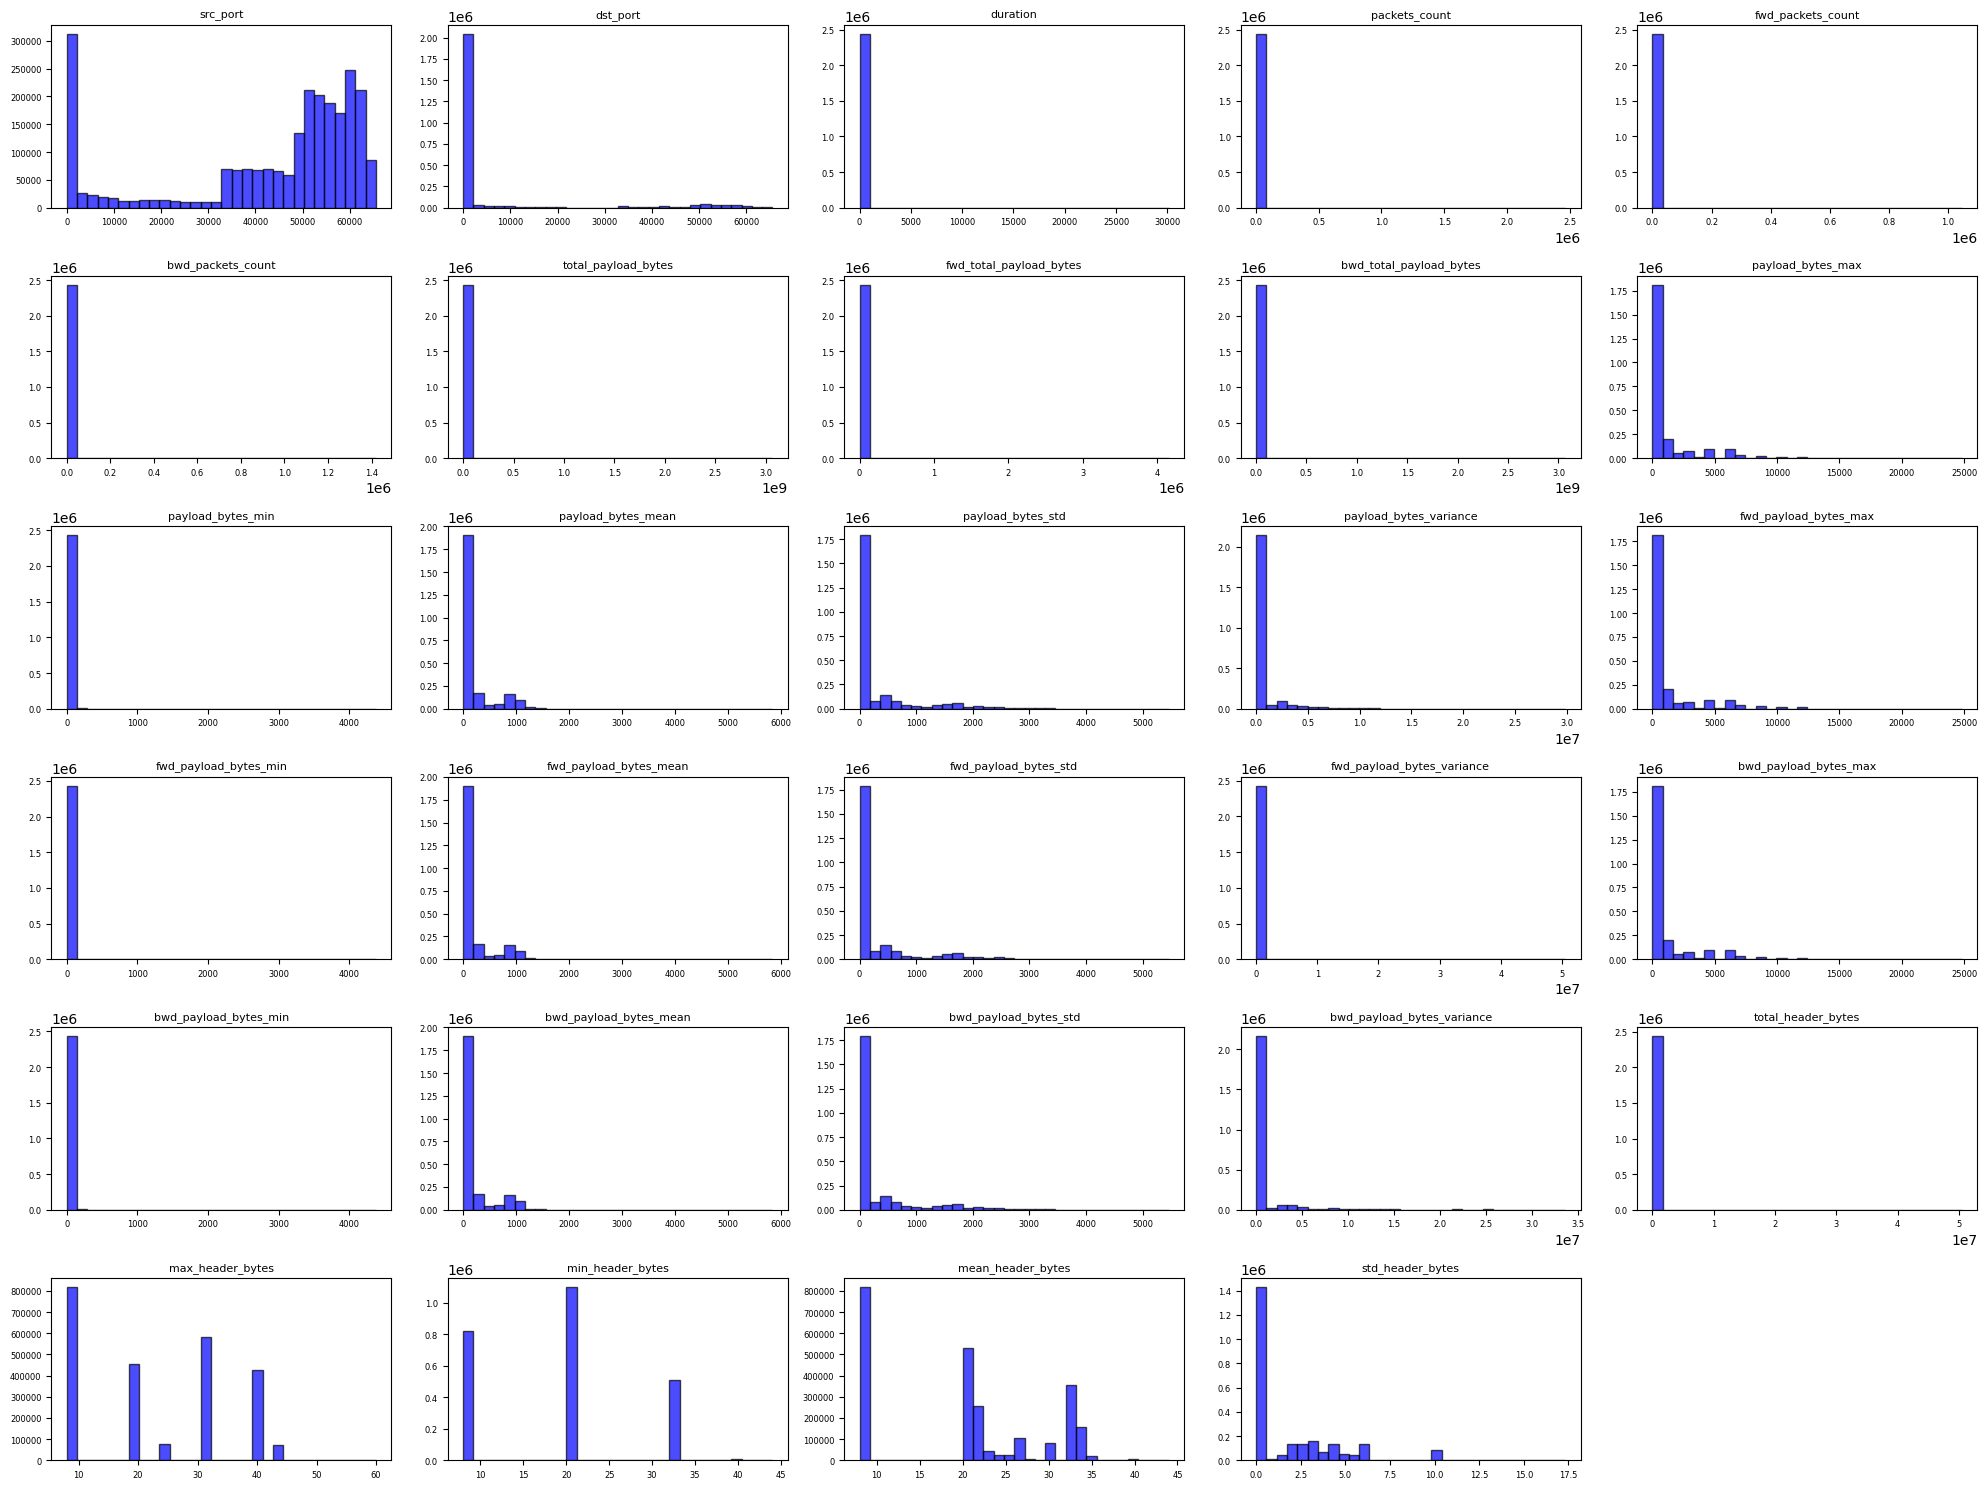

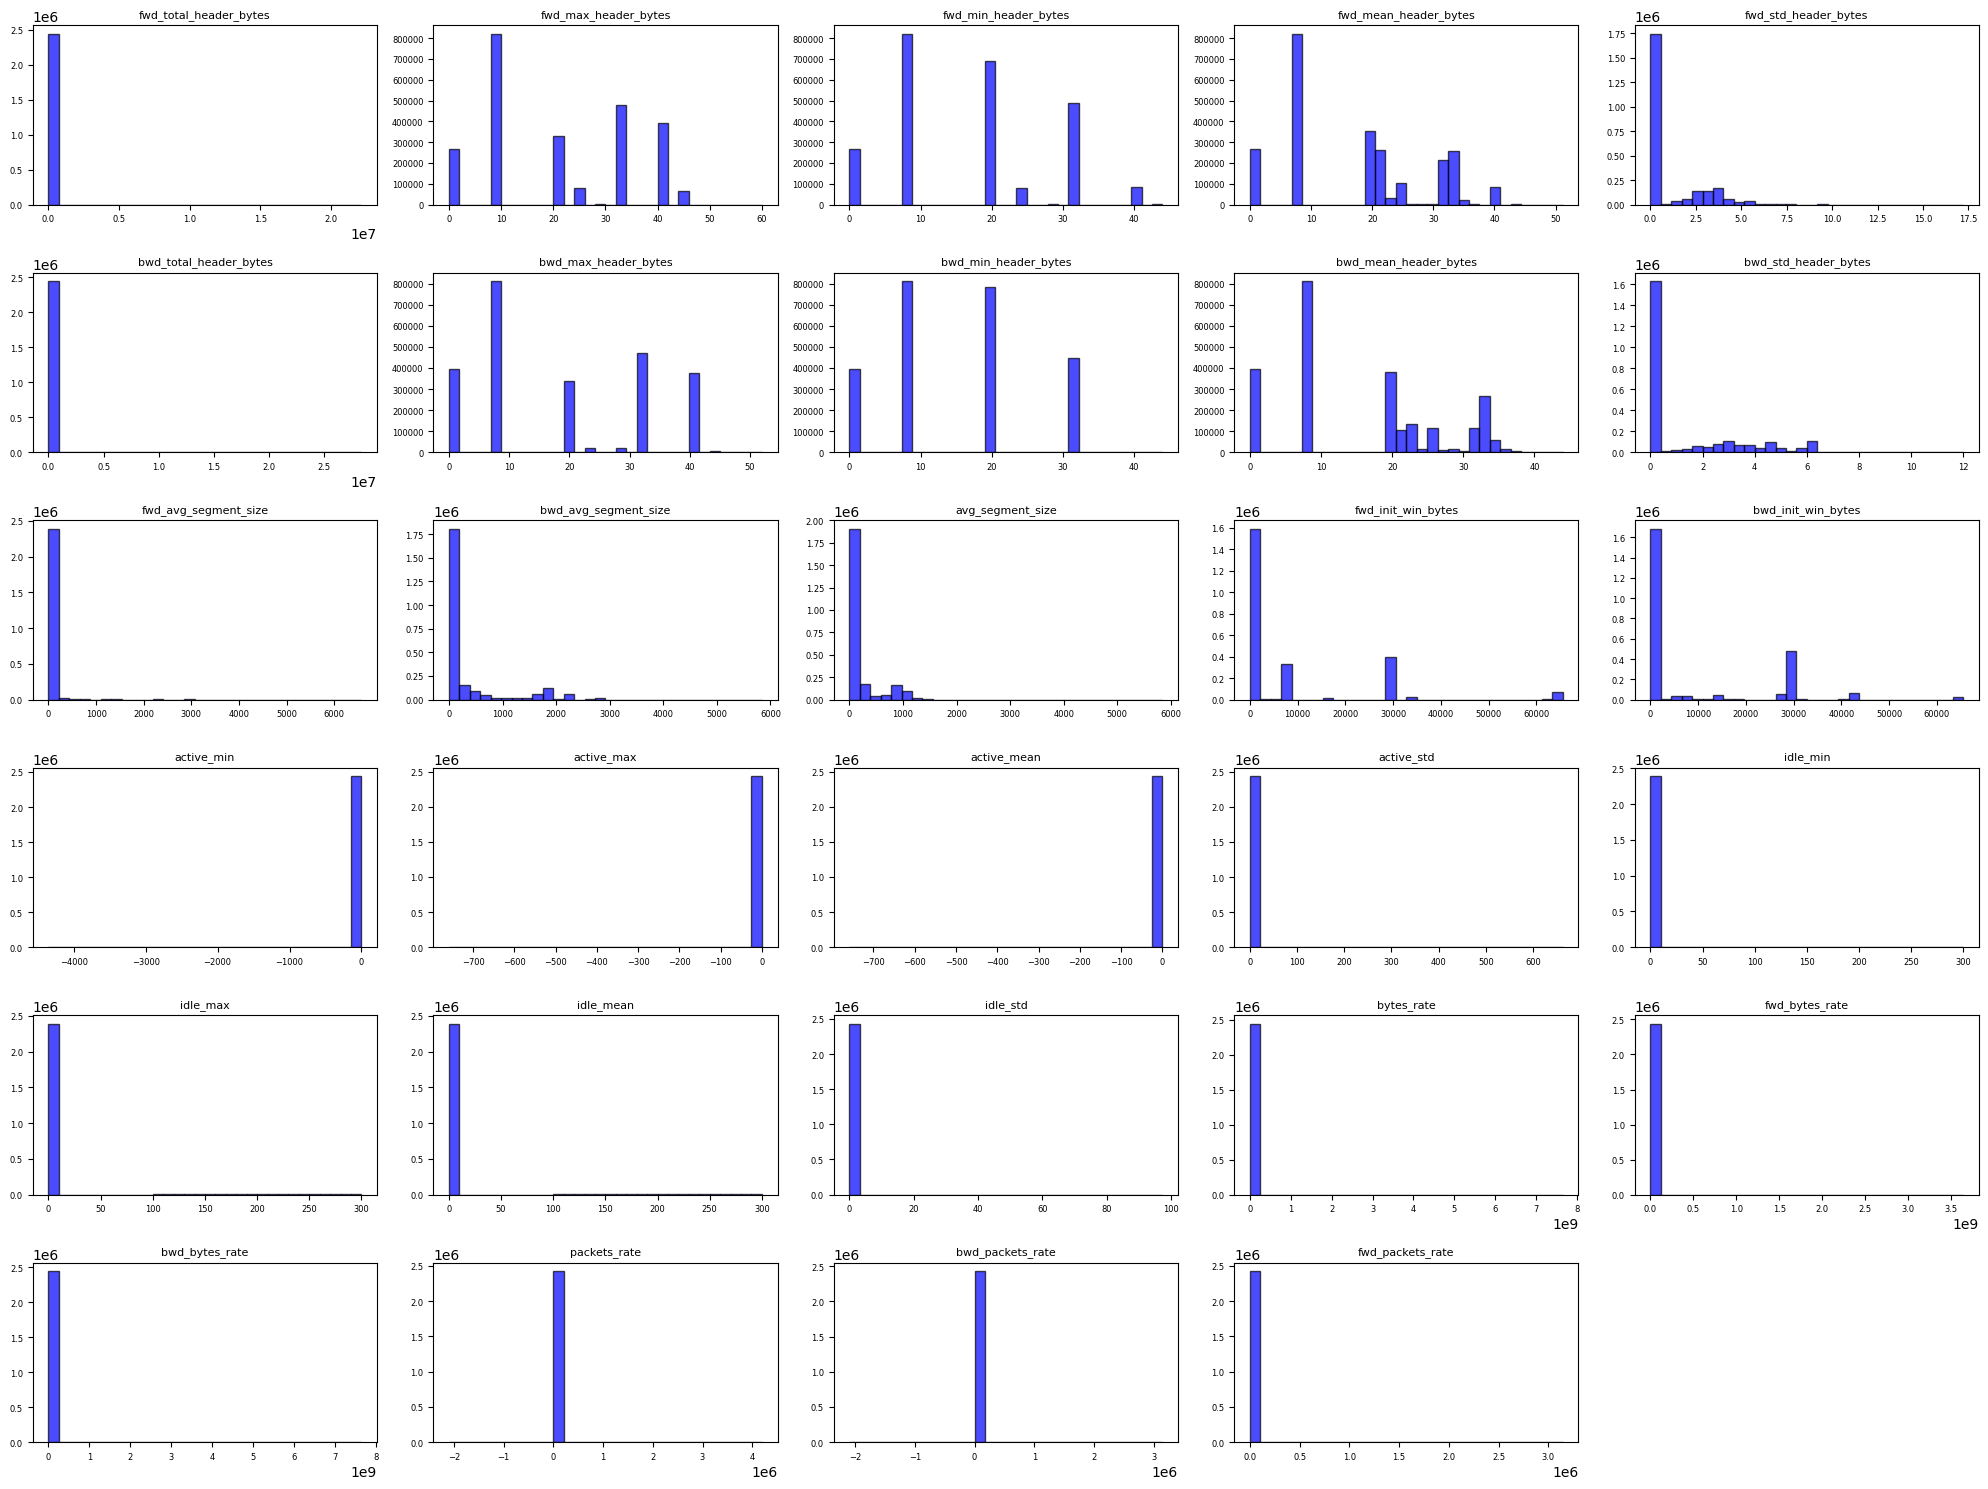

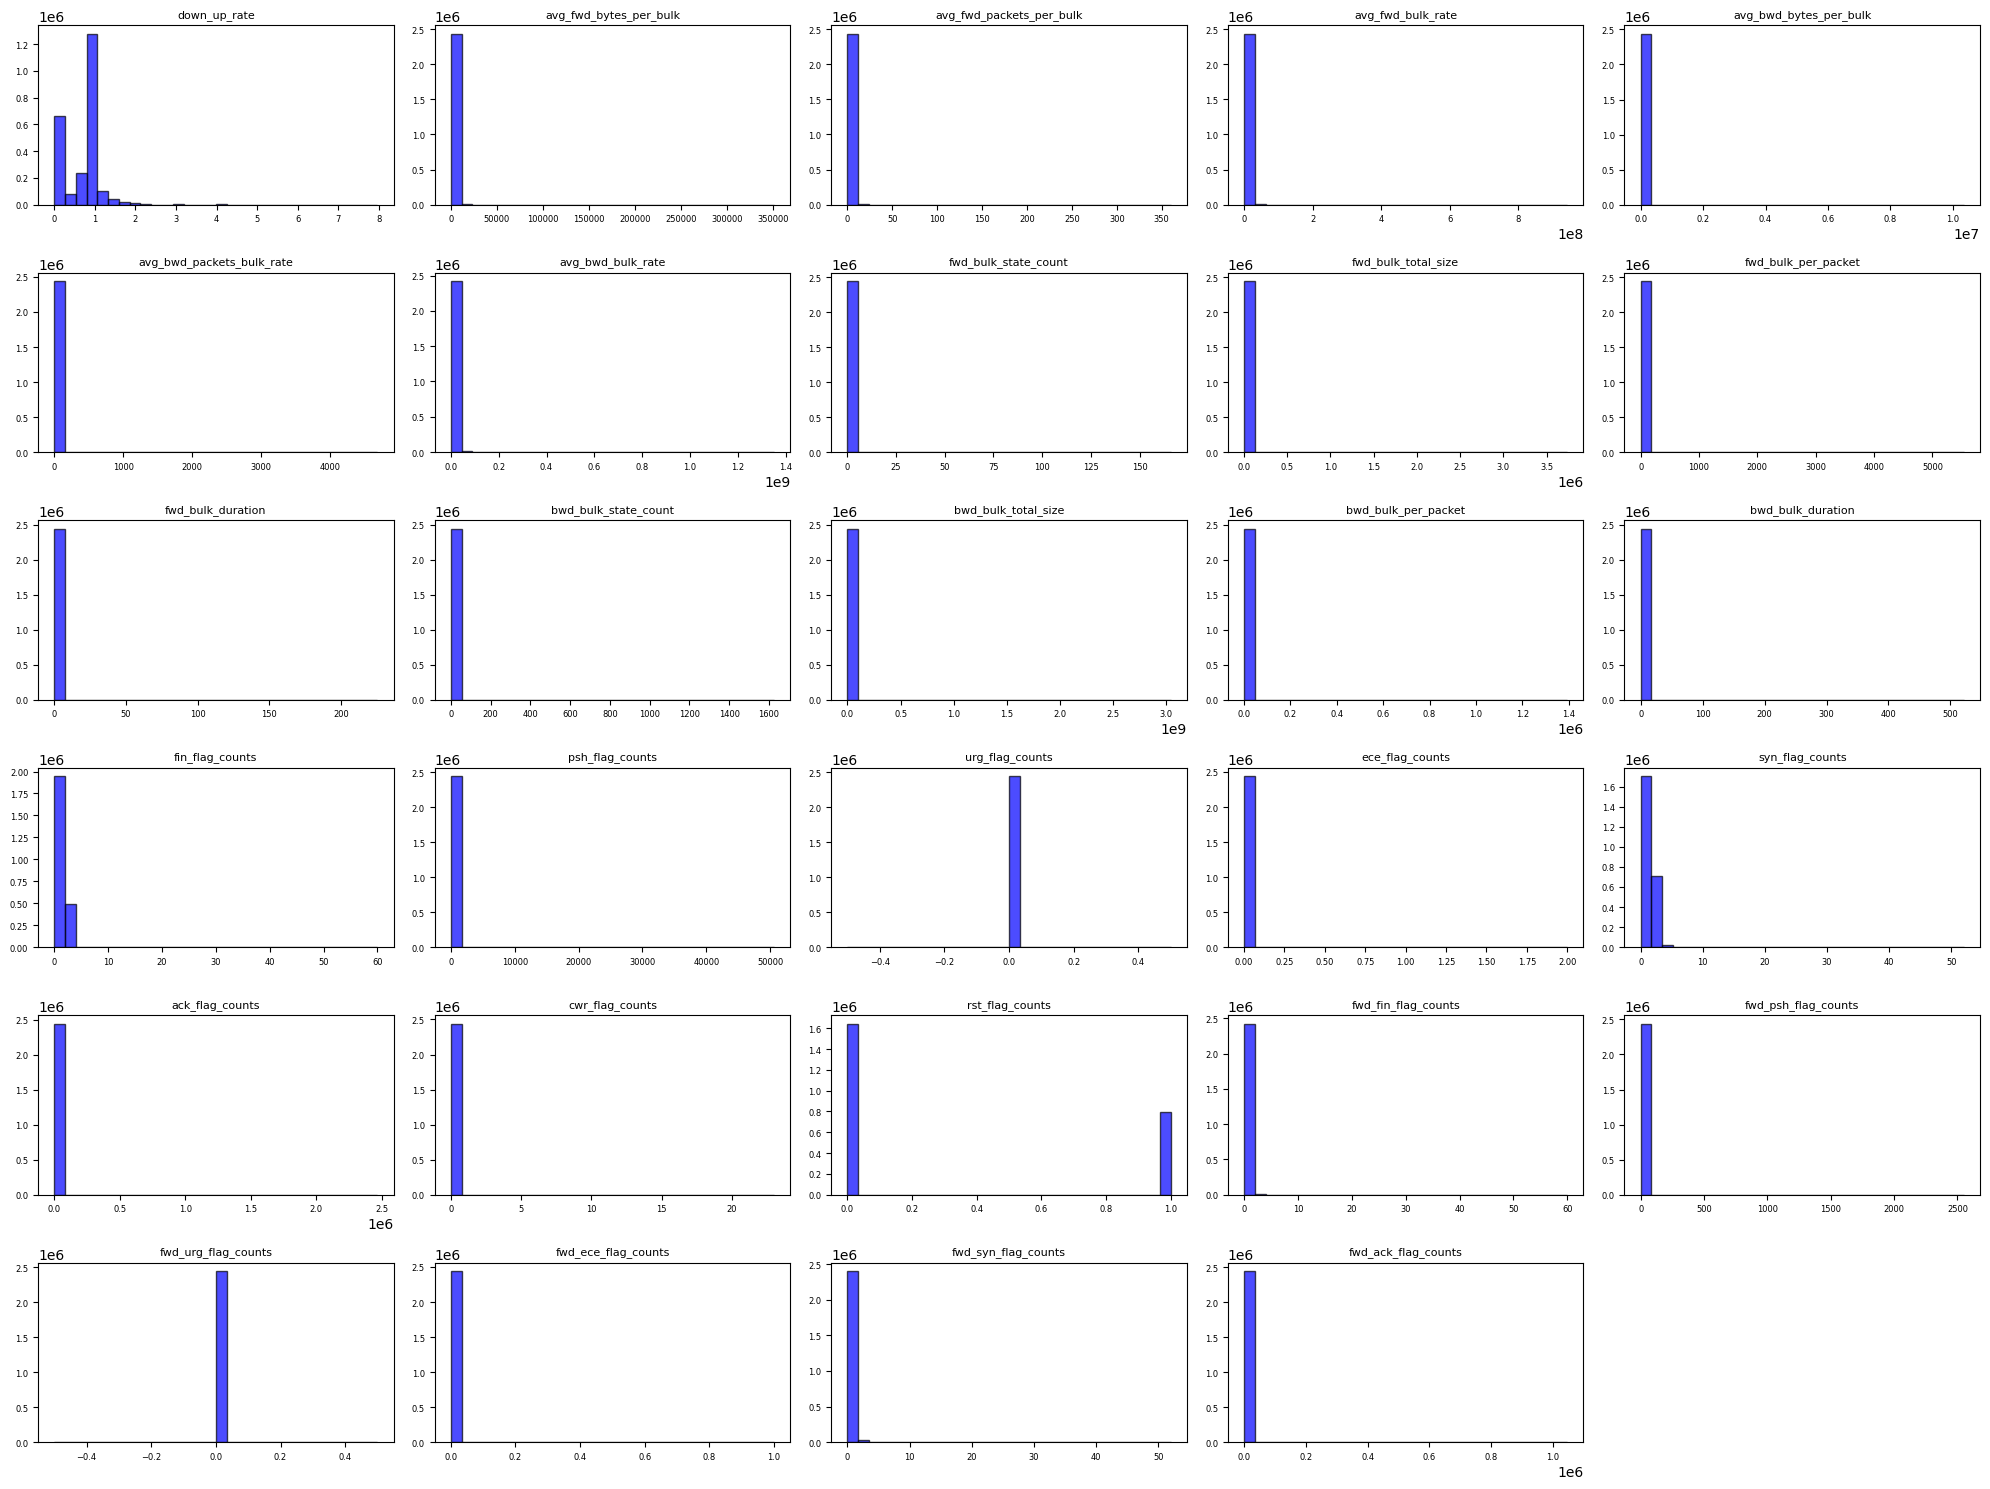

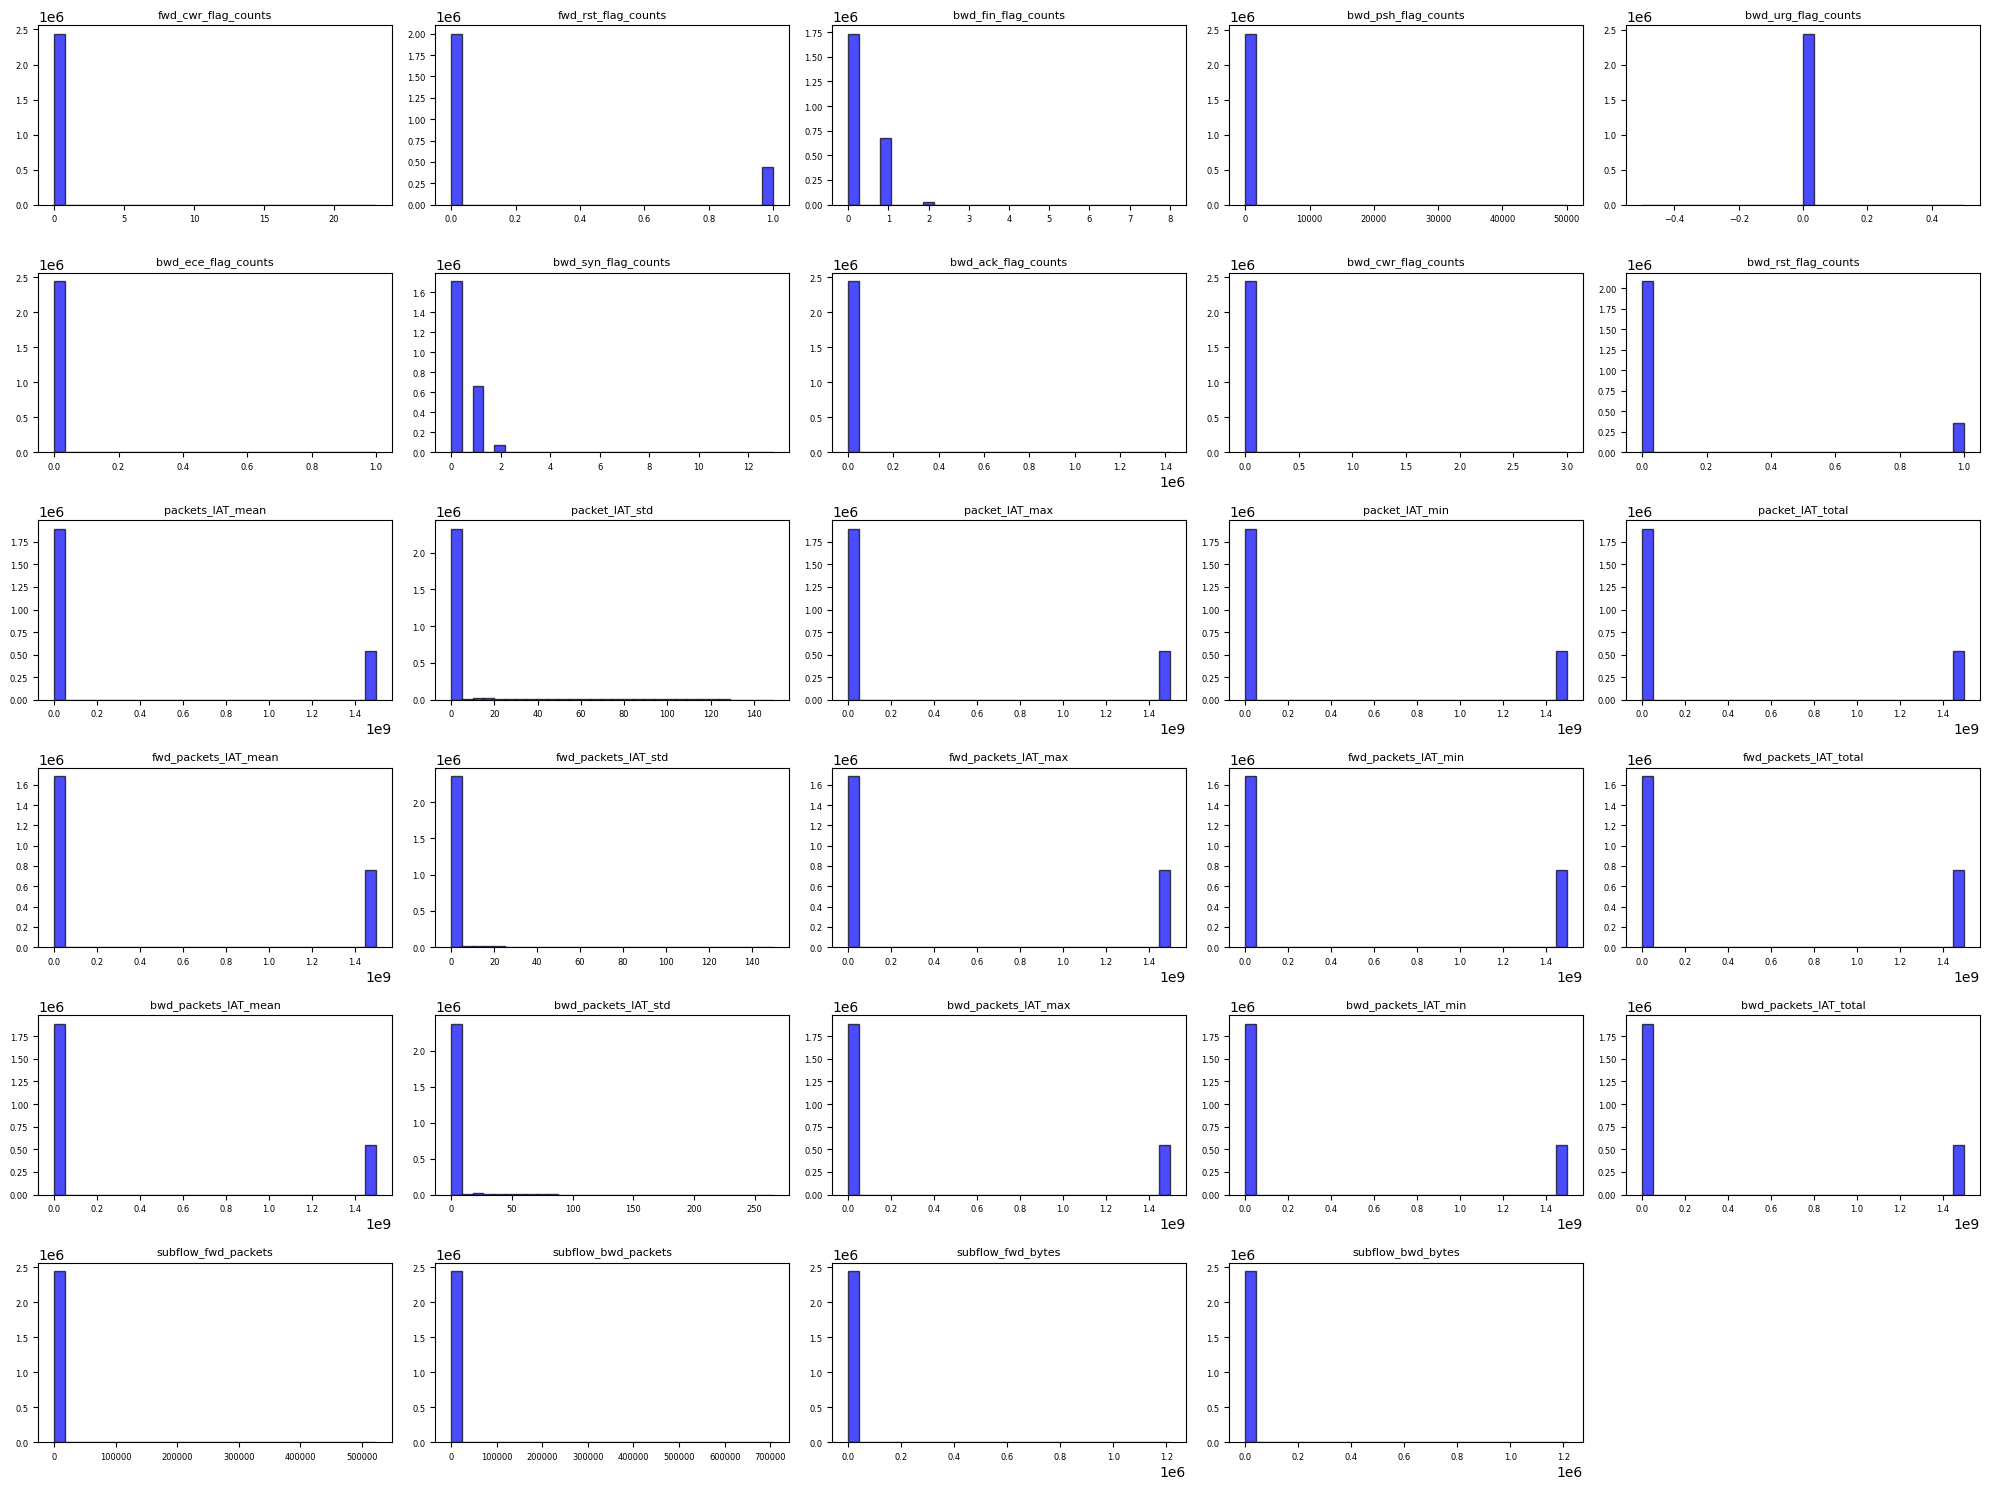

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms_in_chunks(dataframe, bins=30, cols=5, figsize=(20, 15)):
    
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    num_features = len(numeric_columns)
    chunk_size = num_features // 4 + (num_features % 4 > 0)
    
    for chunk_idx in range(0, num_features, chunk_size):
        chunk_columns = numeric_columns[chunk_idx:chunk_idx + chunk_size]
        num_cols = len(chunk_columns)
        rows = (num_cols // cols) + (num_cols % cols > 0)
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        axes = axes.flatten()

        for i, column in enumerate(chunk_columns):
            axes[i].hist(dataframe[column].dropna(), bins=bins, alpha=0.7, color='blue', edgecolor='black')
            axes[i].set_title(column, fontsize=8)
            axes[i].tick_params(axis='both', which='major', labelsize=6)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

# Call the function on combined_dataframe
plot_histograms_in_chunks(combined_dataframe)

BOXPLOT

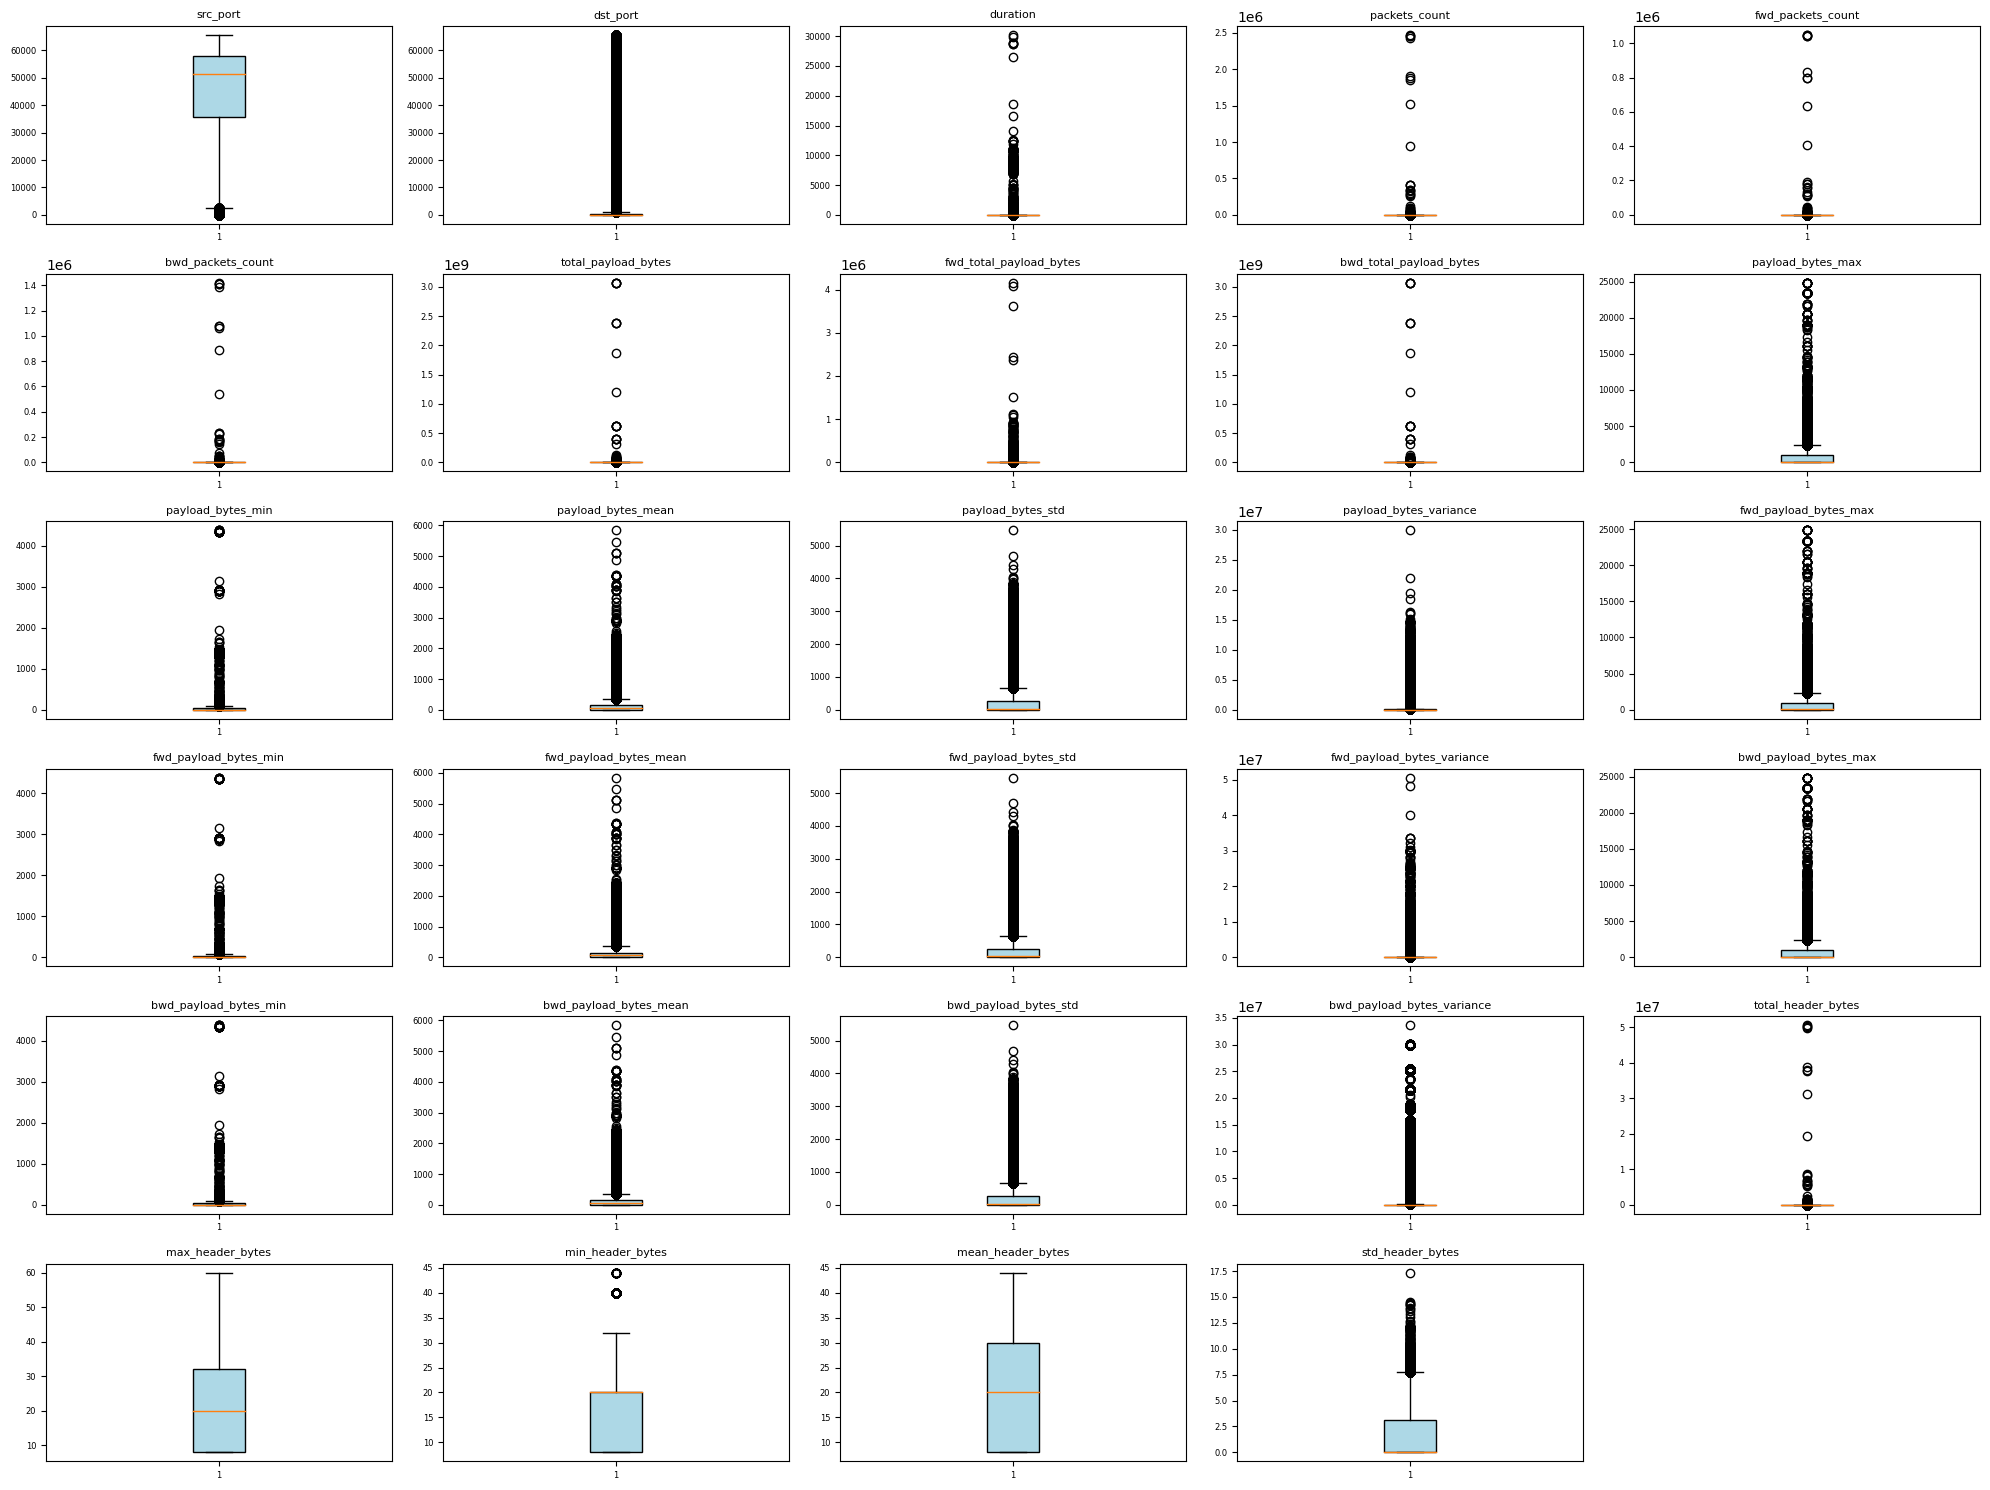

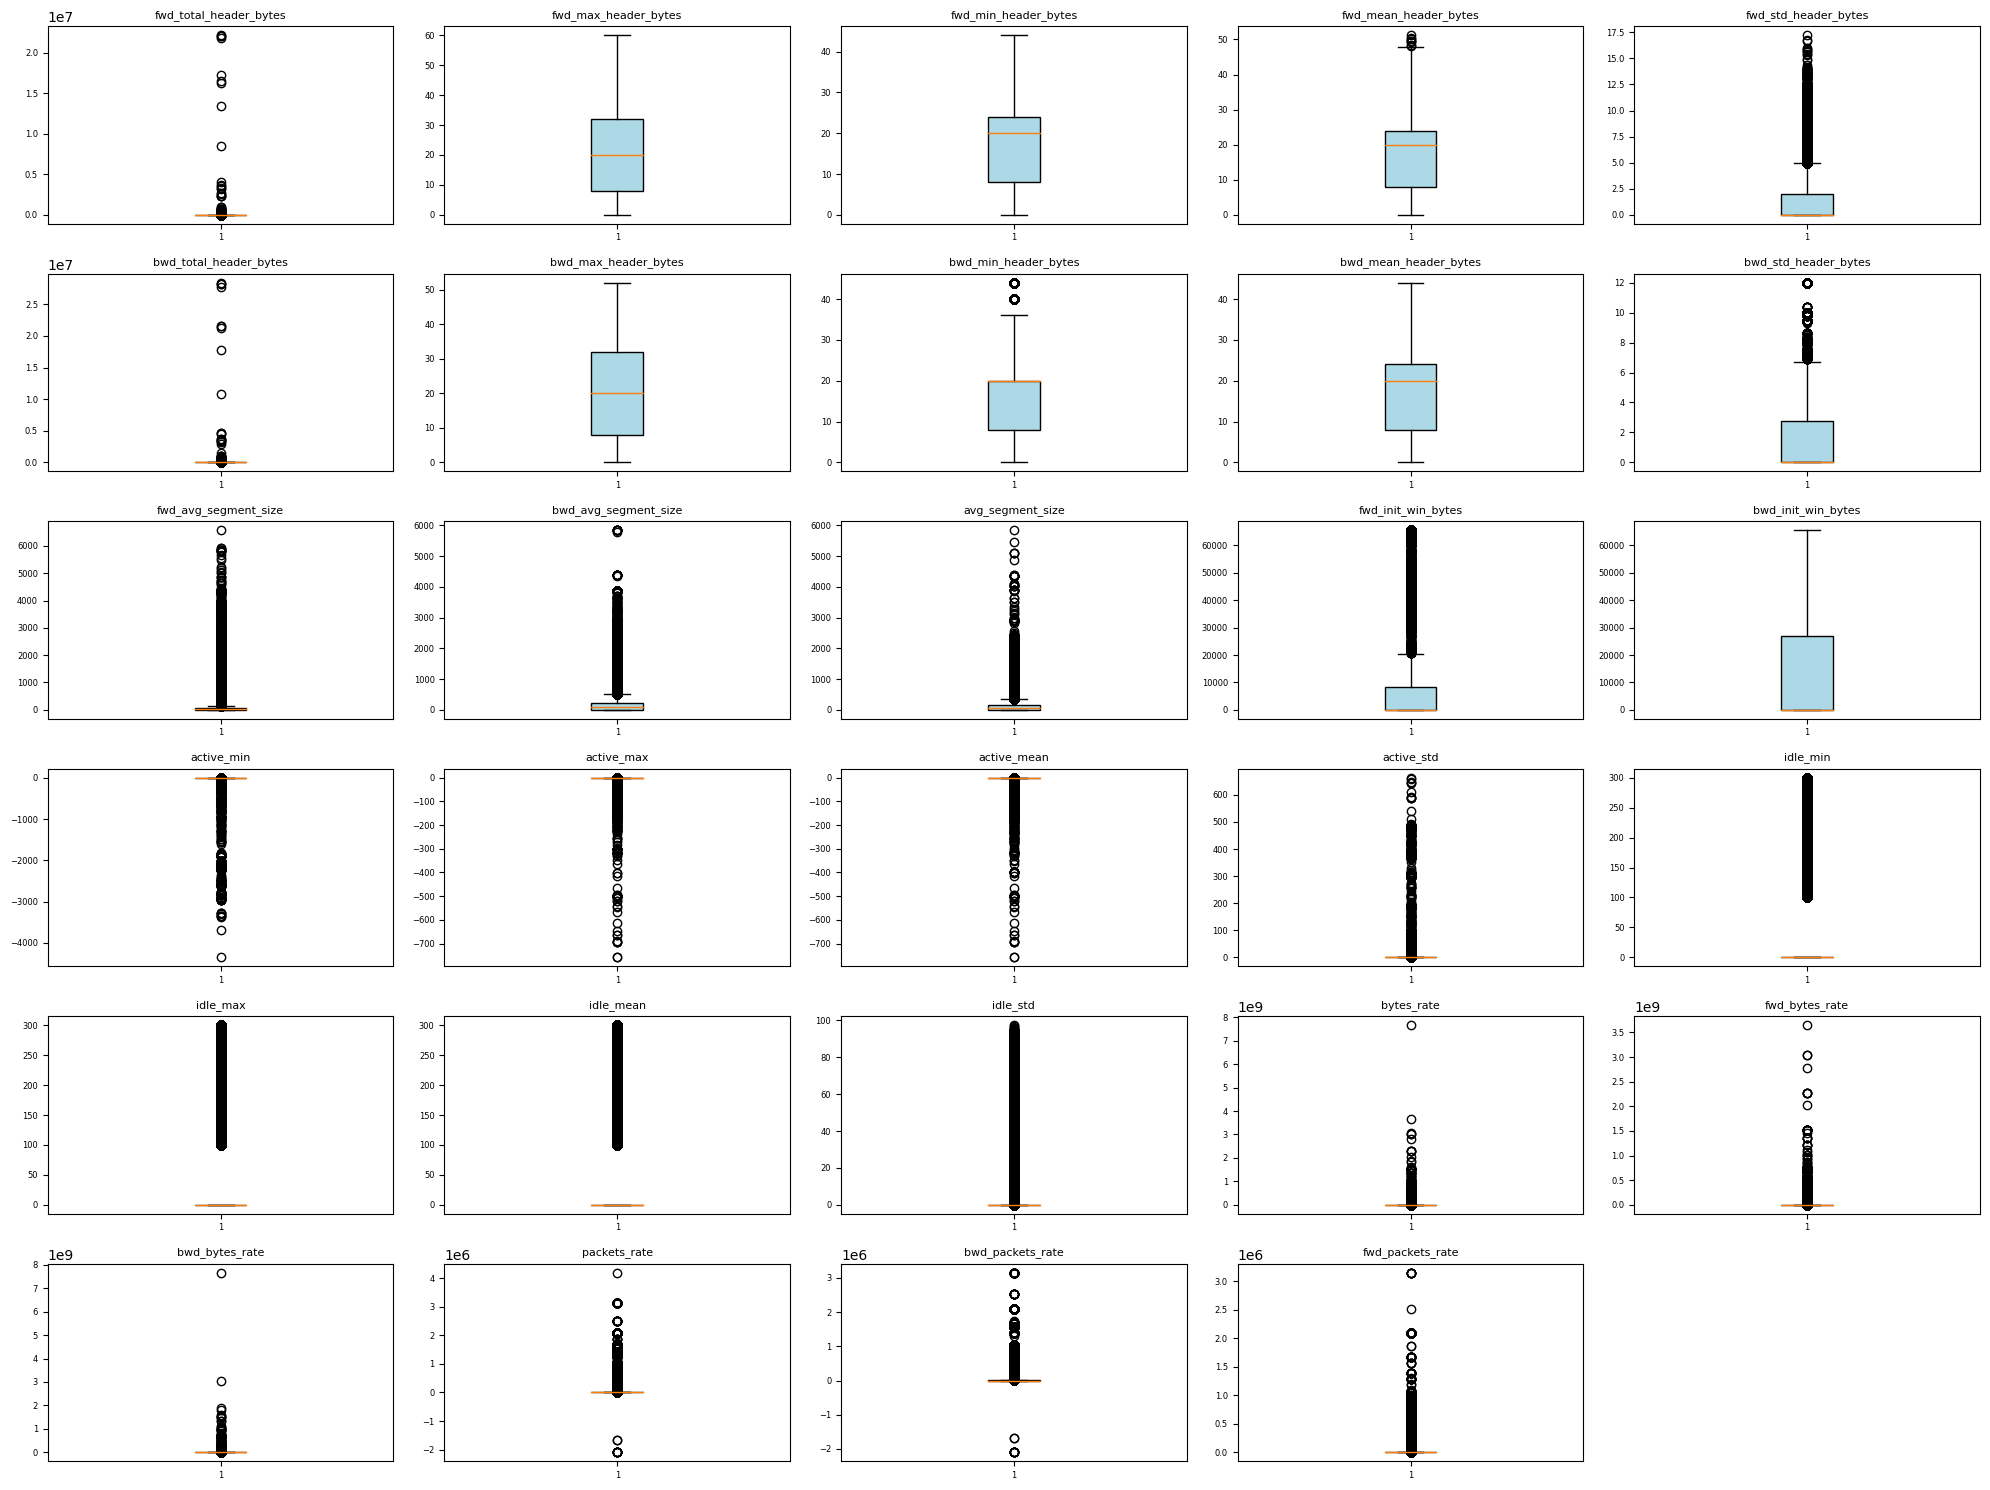

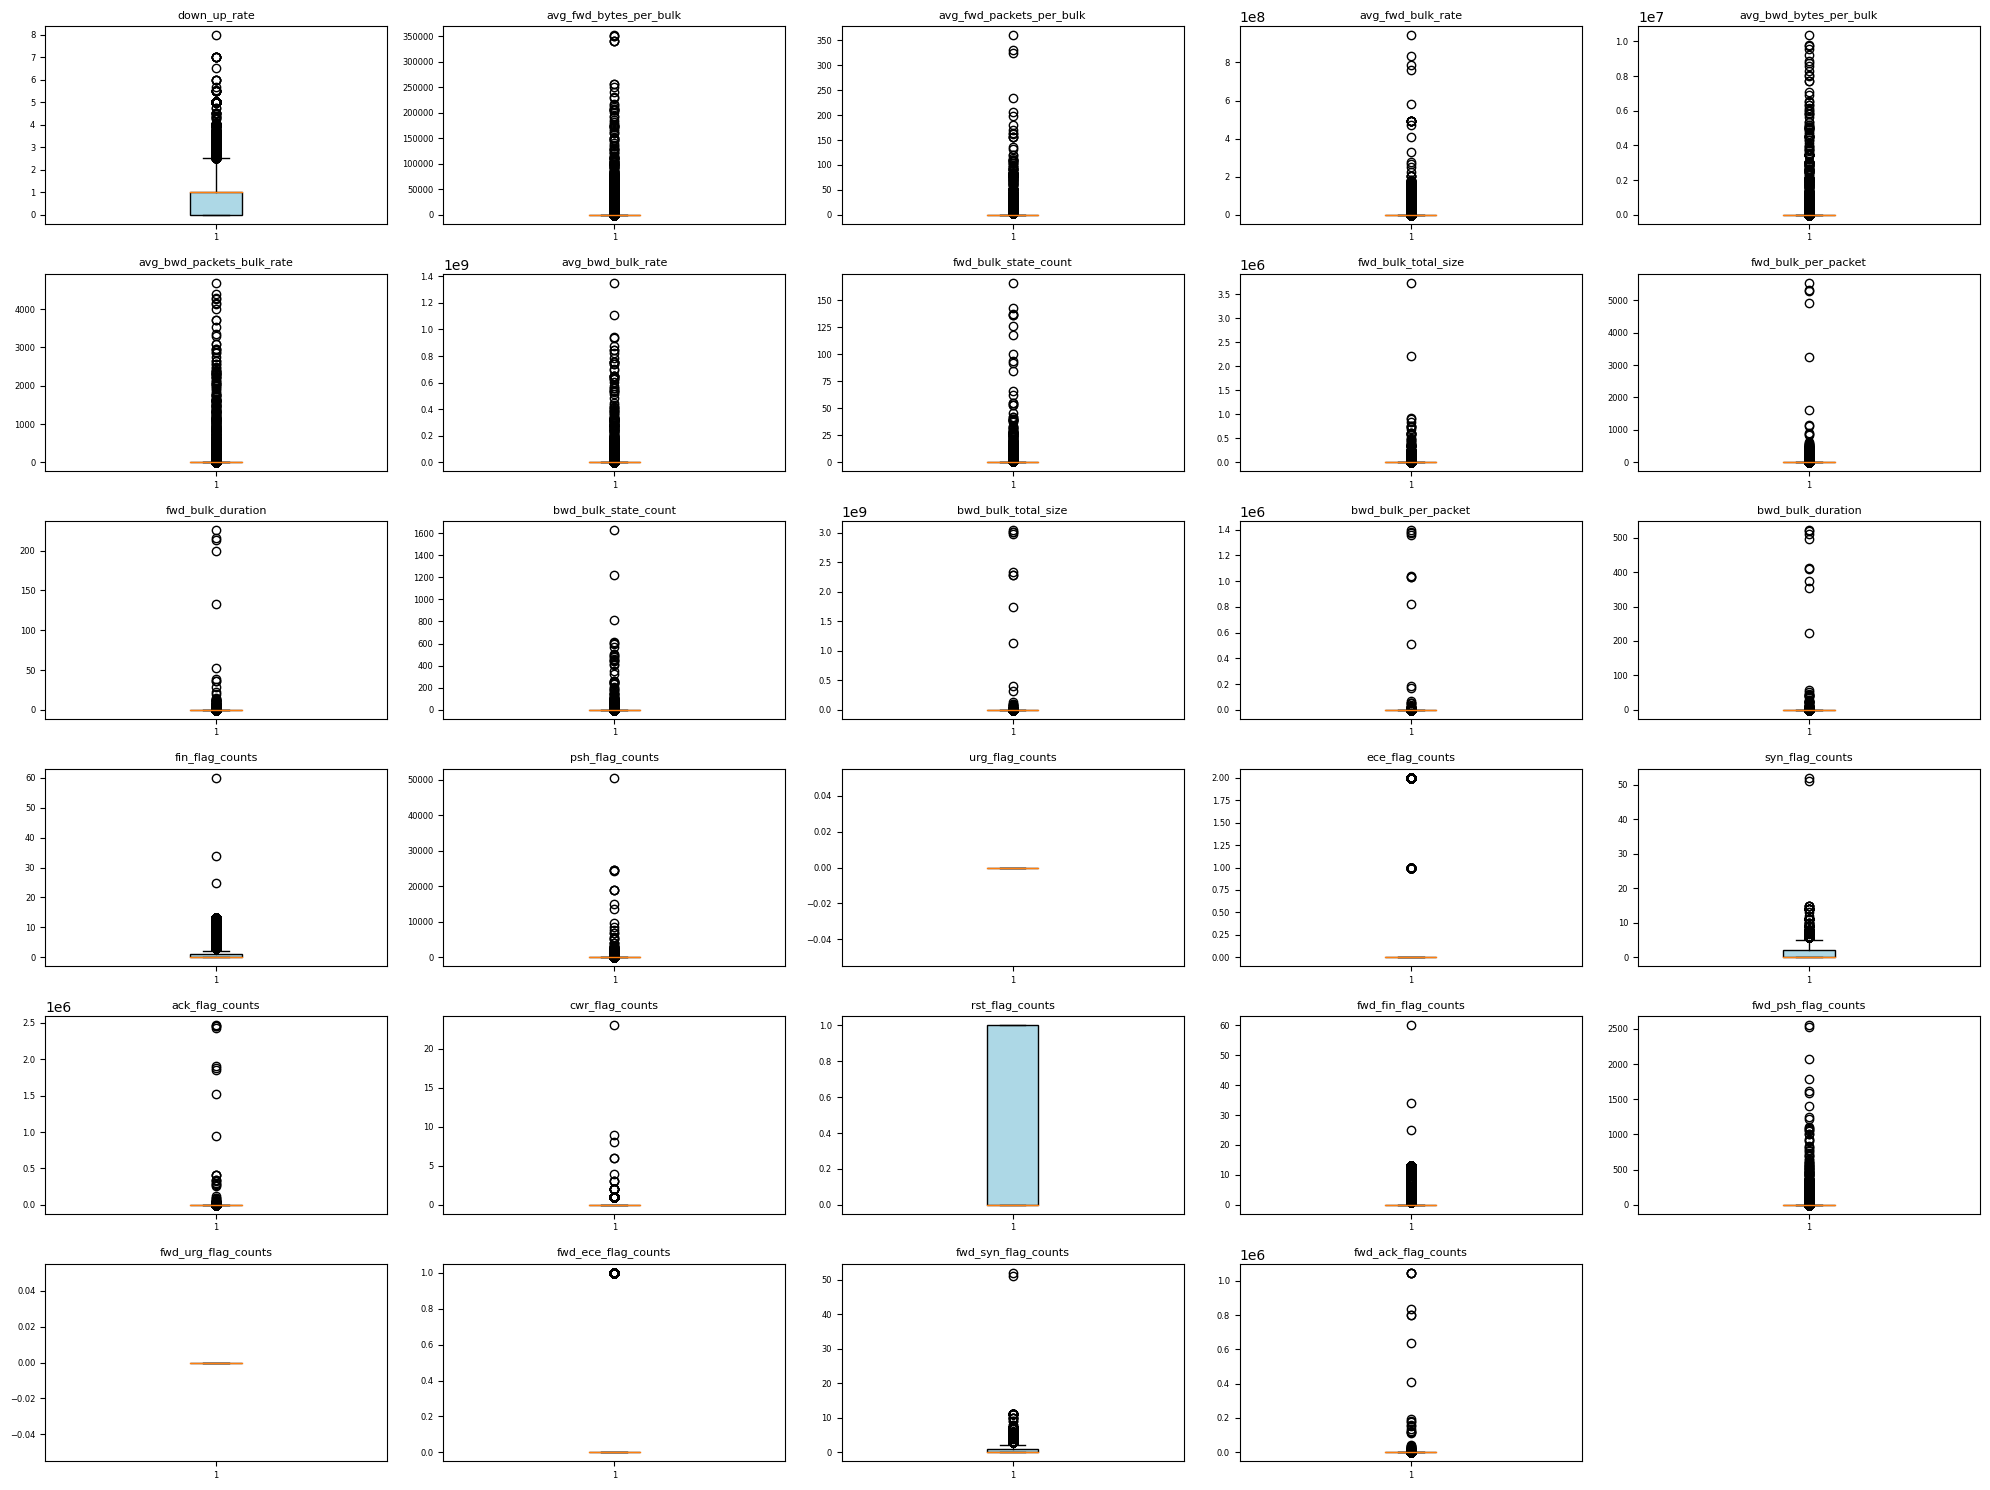

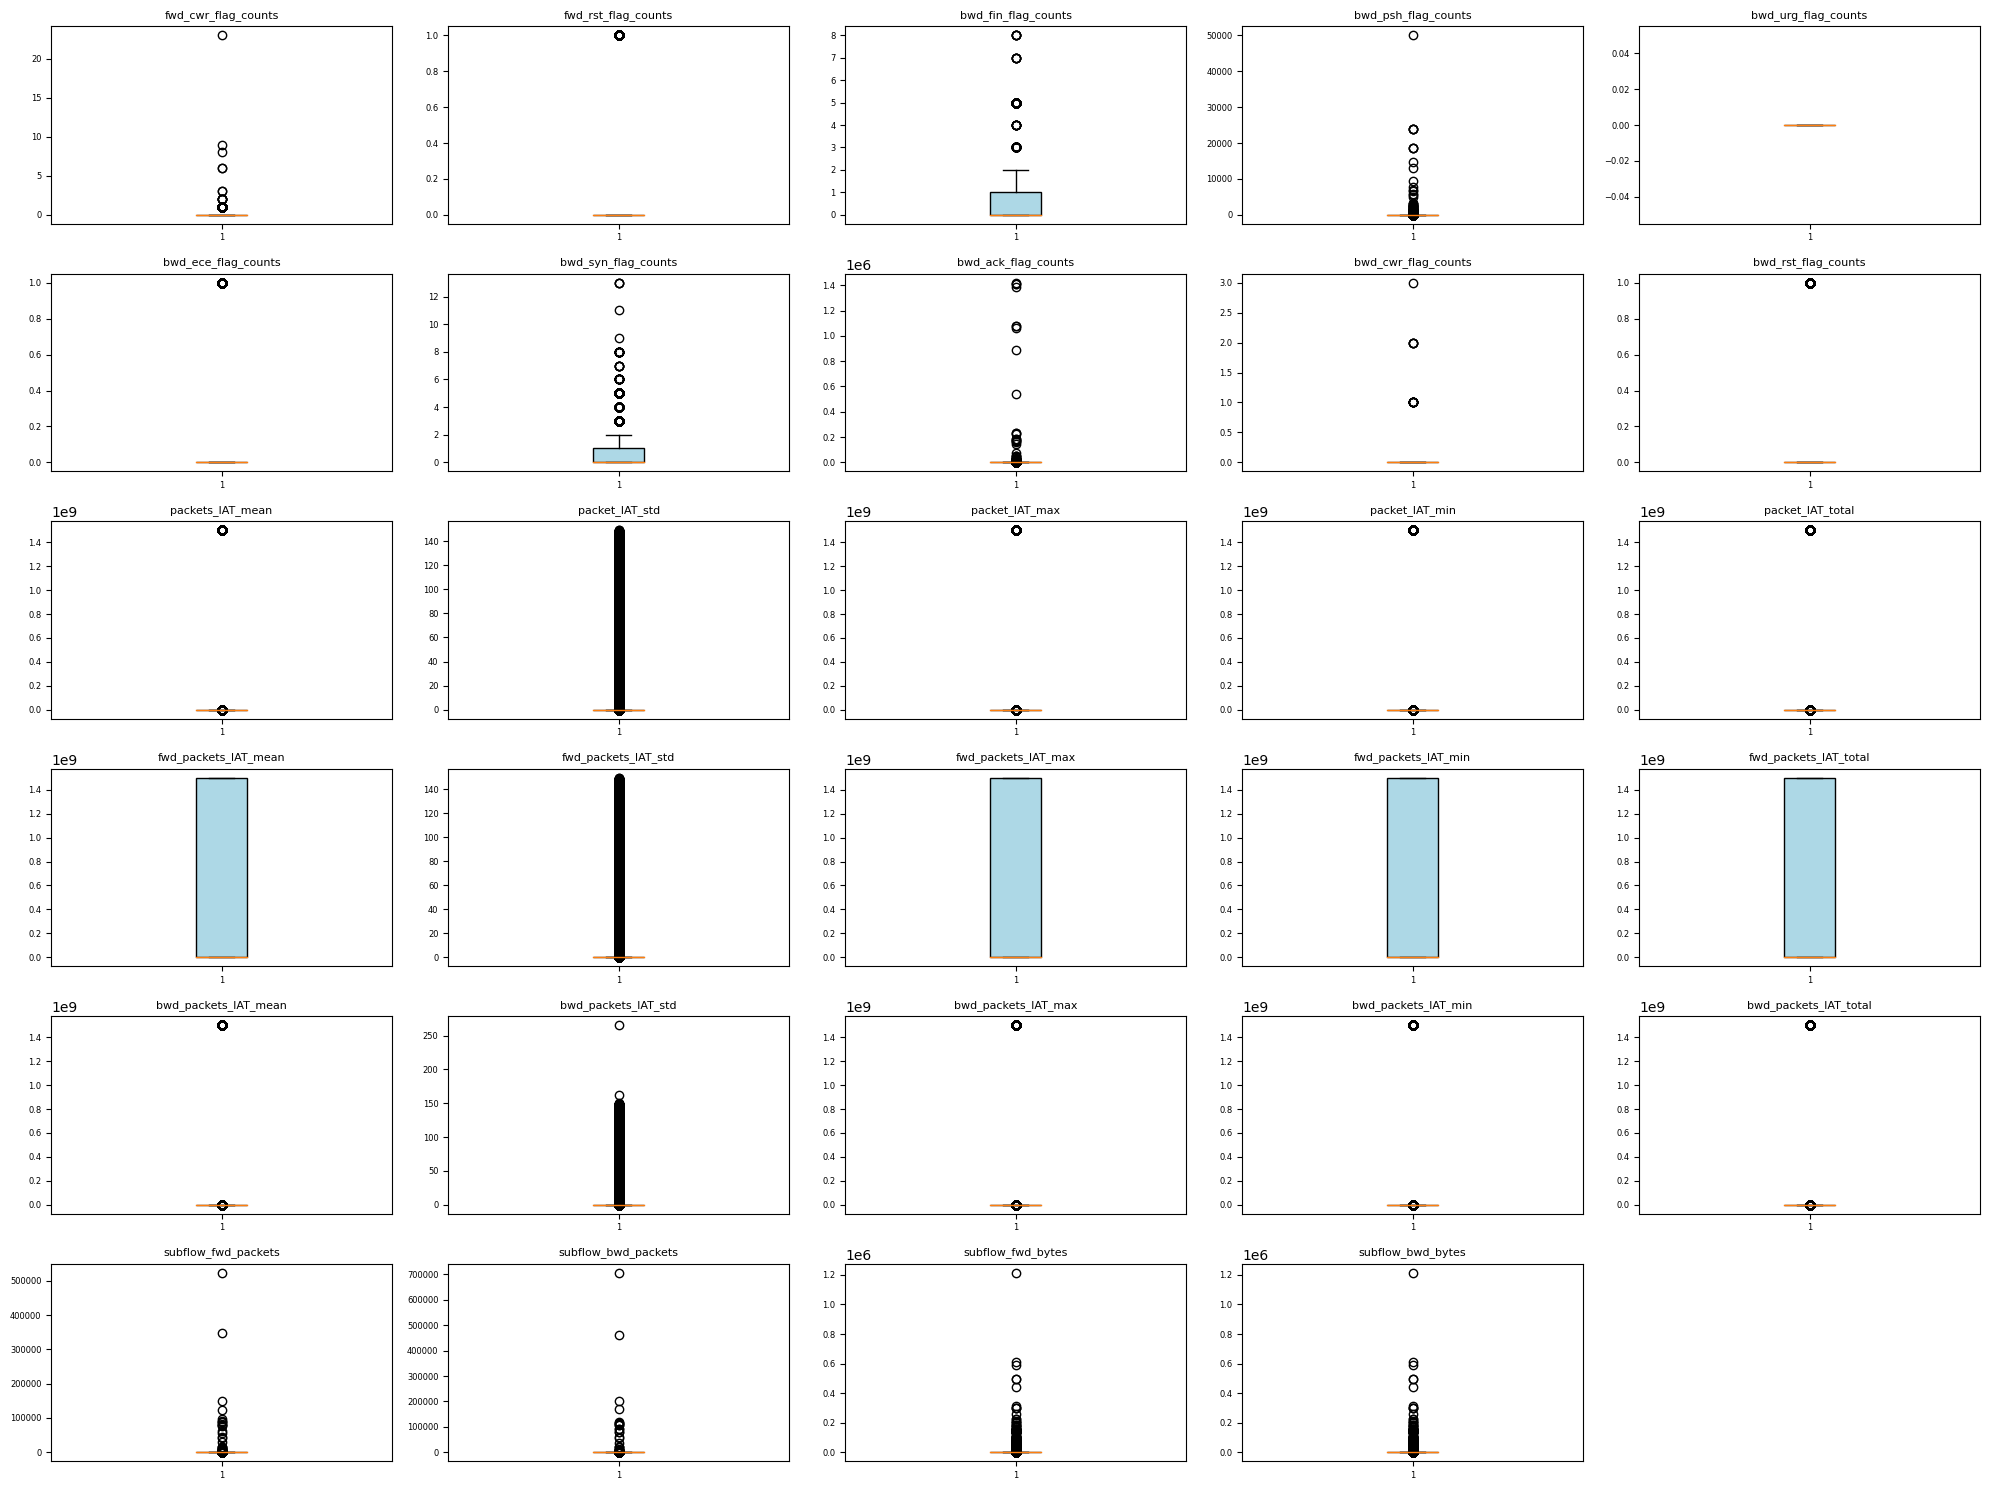

In [6]:
import matplotlib.pyplot as plt

def plot_boxplots_in_chunks(dataframe, cols=5, figsize=(20, 15)):
    
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    num_features = len(numeric_columns)
    chunk_size = num_features // 4 + (num_features % 4 > 0)
    
    for chunk_idx in range(0, num_features, chunk_size):
        chunk_columns = numeric_columns[chunk_idx:chunk_idx + chunk_size]
        num_cols = len(chunk_columns)
        rows = (num_cols // cols) + (num_cols % cols > 0)
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        axes = axes.flatten()

        for i, column in enumerate(chunk_columns):
            axes[i].boxplot(dataframe[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
            axes[i].set_title(column, fontsize=8)
            axes[i].tick_params(axis='x', which='major', labelsize=6)
            axes[i].tick_params(axis='y', which='major', labelsize=6)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

# Call the function on combined_dataframe
plot_boxplots_in_chunks(combined_dataframe)

HEATMAP

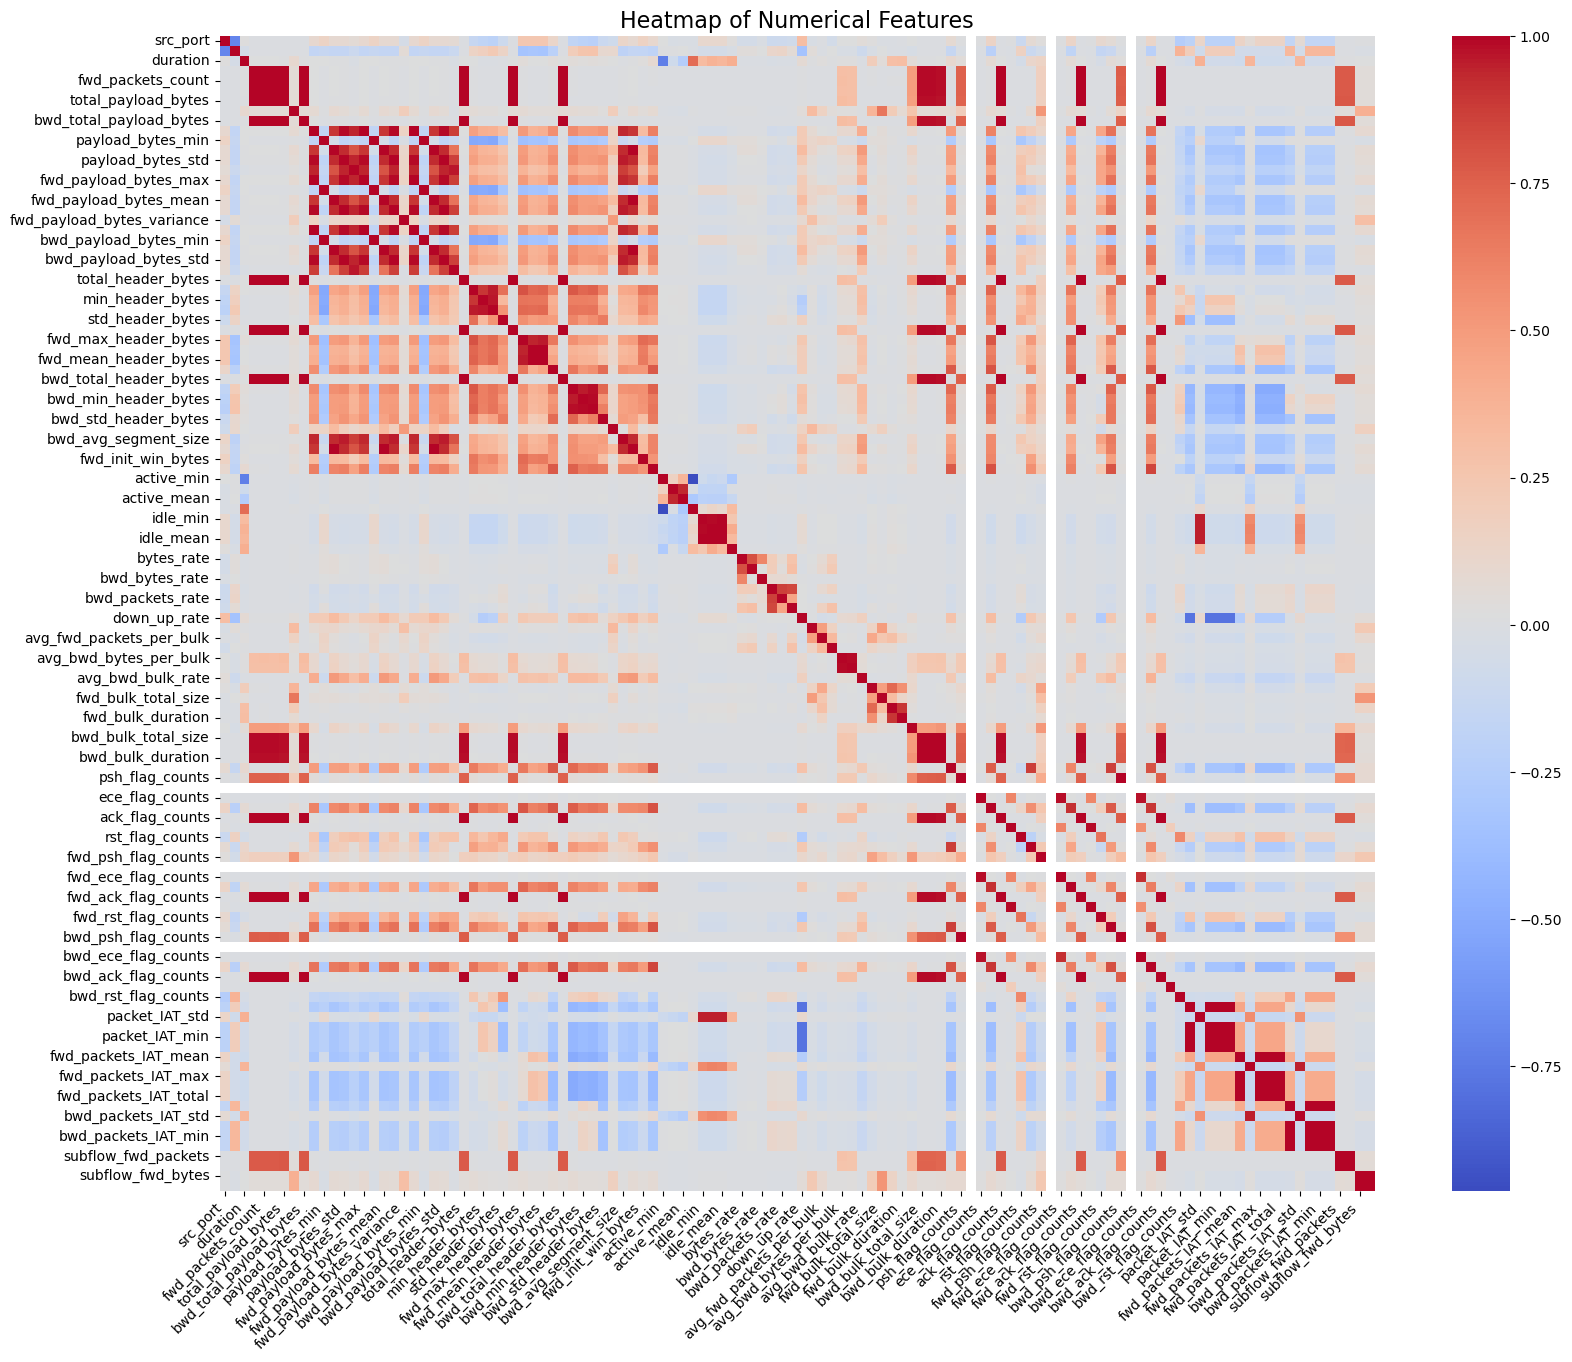

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(dataframe, figsize=(20, 15), cmap="coolwarm"):
    
    # Select only numerical columns
    numeric_data = dataframe.select_dtypes(include=['number'])

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        correlation_matrix,
        annot=False,          # Change to True to display correlation values on the heatmap
        fmt=".2f",
        cmap=cmap,
        cbar=True,
        square=True
    )
    plt.title("Heatmap of Numerical Features", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Call the function on combined_dataframe
plot_heatmap(combined_dataframe)

SUMMARY STATISTICAL

In [8]:
#Summary Statistical 
summary = combined_dataframe.describe(include='all')
print(summary)

                                                  flow_id  \
count                                             2438052   
unique                                            2434869   
top     172.16.0.1_37498_192.168.10.50_80_TCP_2017-07-...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                         timestamp      src_ip      src_port        dst_ip  \
count                      2438052     2438052  2.438052e+06       2438052   
unique                     2401776       11965           NaN         18091   
top     2017-07-05 10:00:06.09790

ASSINGMENT 2

REMOVING DUPLICATED ROWS

In [3]:
# Remove duplicate rows while keeping the first occurrence
combined_dataframe = combined_dataframe.drop_duplicates()

# Return the number of remaining duplicates (should be 0)
remaining_duplicates = combined_dataframe.duplicated().sum()
print(f"Duplicate rows removed. Remaining duplicate count: {remaining_duplicates}")

#Shape
combined_dataframe.shape

Duplicate rows removed. Remaining duplicate count: 0


(2435692, 122)

HANDLING OUTLIERS

In [4]:
import numpy as np

# Identify numeric columns
numeric_cols = combined_dataframe.select_dtypes(include=['number']).columns

# Function to handle outliers using IQR method
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median of the column
        median_value = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

    return df

# Apply the function to handle outliers
combined_dataframe = handle_outliers_iqr(combined_dataframe, numeric_cols)

# Verify that outliers are handled
print("Outliers have been replaced with median values.")

#Shape
combined_dataframe.shape

Outliers have been replaced with median values.


(2435692, 122)

VARIABLES WITH CORRELATION > 0.85

In [11]:
import pandas as pd

# Compute correlation matrix
corr_matrix = combined_dataframe.corr(method='pearson')

# Define correlation threshold
threshold = 0.85
high_correlation_features = set()

# Identify highly correlated features
for col in corr_matrix.columns:
    high_corr = corr_matrix[abs(corr_matrix[col]) > threshold].index.tolist()
    
    # Ensure col is removed from its own correlation list
    if col in high_corr:
        high_corr.remove(col)
    
    # Add correlated features to the set
    high_correlation_features.update(high_corr)

# Drop highly correlated features and store in combined_dataframe_clean
combined_dataframe_clean = combined_dataframe.drop(columns=high_correlation_features)

print(f"Highly correlated features: {high_correlation_features}")

# Shape of the cleaned dataset
print(combined_dataframe_clean.shape)

Highly correlated features: {'fwd_payload_bytes_max', 'avg_segment_size', 'max_header_bytes', 'fwd_packets_IAT_min', 'bwd_fin_flag_counts', 'bwd_mean_header_bytes', 'fwd_min_header_bytes', 'bwd_total_header_bytes', 'packet_IAT_total', 'fwd_ack_flag_counts', 'bwd_payload_bytes_min', 'fin_flag_counts', 'ack_flag_counts', 'bwd_std_header_bytes', 'bytes_rate', 'fwd_syn_flag_counts', 'min_header_bytes', 'bwd_syn_flag_counts', 'bwd_ack_flag_counts', 'total_header_bytes', 'bwd_packets_count', 'fwd_payload_bytes_mean', 'fwd_packets_count', 'fwd_payload_bytes_std', 'fwd_total_header_bytes', 'payload_bytes_min', 'bwd_init_win_bytes', 'packets_count', 'bwd_bytes_rate', 'payload_bytes_mean', 'bwd_max_header_bytes', 'bwd_payload_bytes_std', 'bwd_payload_bytes_max', 'fwd_packets_IAT_mean', 'std_header_bytes', 'bwd_packets_IAT_total', 'fwd_mean_header_bytes', 'syn_flag_counts', 'fwd_max_header_bytes', 'bwd_psh_flag_counts', 'mean_header_bytes', 'fwd_packets_IAT_total', 'payload_bytes_max', 'payload_b

SPLITTING DATASET IN 80% TRAINING / 20% TESTING

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = combined_dataframe.drop(columns=['label'])  # Features dataset
y = combined_dataframe['label']  # Target variable dataset

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dataset references
# X_train  -> Training Features (80% of X)
# X_test   -> Testing Features (20% of X)
# y_train  -> Training Labels (80% of y)
# y_test   -> Testing Labels (20% of y)

PERFORMING A CHI-SQUARE

In [13]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the target variable
y = y_train  # y_train is already defined separately

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables into numeric using Label Encoding
X_categorical = X_train[categorical_cols].apply(LabelEncoder().fit_transform)

# Apply the Chi-Square Test
chi_scores, p_values = chi2(X_categorical, y)

# Store results in a DataFrame
chi_results = pd.DataFrame({"Feature": categorical_cols, "Chi2 Score": chi_scores, "P-Value": p_values})

# Select features with p-value < 0.05 (statistically significant)
selected_features_chi2 = chi_results[chi_results["P-Value"] < 0.05]["Feature"].tolist()

# Display results
print("Chi-Square Test Results:")
print(chi_results)

print("\nSelected Features (Chi-Square Test):")
print(selected_features_chi2)

Chi-Square Test Results:
     Feature    Chi2 Score  P-Value
0    flow_id  2.451544e+11      0.0
1  timestamp  1.608252e+11      0.0
2     src_ip  1.159507e+08      0.0
3     dst_ip  1.146733e+08      0.0
4   protocol  2.380086e+05      0.0

Selected Features (Chi-Square Test):
['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol']


PERFORMING ANOVA

In [14]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Define the target variable
y = y_train  # Use y_train directly

# Identify numerical columns in X_train
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Select numerical features only
X_numerical = X_train[numerical_cols]

# Apply ANOVA F-test
anova_scores, p_values = f_classif(X_numerical, y)

# Store results in a DataFrame
anova_results = pd.DataFrame({"Feature": numerical_cols, "ANOVA Score": anova_scores, "P-Value": p_values})

# Select features with p-value < 0.05 (statistically significant)
selected_features_anova = anova_results[anova_results["P-Value"] < 0.05]["Feature"].tolist()

# Display results
print("ANOVA Test Results:")
print(anova_results)

print("\nSelected Features (ANOVA Test):")
print(selected_features_anova)

ANOVA Test Results:
                   Feature   ANOVA Score  P-Value
0                 src_port   1675.472625      0.0
1                 dst_port   8689.184617      0.0
2                 duration   3167.000216      0.0
3            packets_count  28997.940280      0.0
4        fwd_packets_count  32175.739674      0.0
..                     ...           ...      ...
111  bwd_packets_IAT_total   4251.009893      0.0
112    subflow_fwd_packets           NaN      NaN
113    subflow_bwd_packets           NaN      NaN
114      subflow_fwd_bytes           NaN      NaN
115      subflow_bwd_bytes           NaN      NaN

[116 rows x 3 columns]

Selected Features (ANOVA Test):
['src_port', 'dst_port', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'fwd_payload_bytes_max', 'fwd_payload_b

C:\Users\Carlos Nakagomi\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 44  45  46  47  48  49  50  51  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  75  76  79  81  83  84  87  88  91  92  95  96 112 113
 114 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Carlos Nakagomi\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


STANZARDIZE THE NUMERICAL FEATURES OF THE DATAFRAME AND PERFORM PCA

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns from X_train
numeric_data = X_train.select_dtypes(include=['number'])

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA without reducing components initially
pca = PCA().fit(scaled_data)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 95% of variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # First index where variance >= 95%

# Display the number of components needed for 95% variance
num_components_95

34

PERFORM MUTUAL INFORMATION  

In [16]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Sample dataset if large
sample_size = 1000000  
if len(combined_dataframe) > sample_size:
    sampled_data = combined_dataframe.sample(n=sample_size, random_state=42)
else:
    sampled_data = combined_dataframe

# Extract features and target variable
X = sampled_data.drop(columns=['label'])  
y = sampled_data['label']

# Convert categorical columns to numeric using label encoding
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtype == 'object' else col)

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Create DataFrame with results
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print top 10 features
print("Top 100 Features by Mutual Information:")
print(mi_df.head(100).to_string(index=False))

Top 100 Features by Mutual Information:
                   Feature  Mutual Information
                 timestamp            0.880257
                   flow_id            0.758417
         mean_header_bytes            0.637896
        total_header_bytes            0.614904
                    dst_ip            0.597073
                    src_ip            0.579962
       fwd_packets_IAT_max            0.568528
     fwd_packets_IAT_total            0.564064
          packet_IAT_total            0.556956
     fwd_mean_header_bytes            0.547604
            packet_IAT_max            0.538876
    fwd_total_header_bytes            0.529178
     bwd_mean_header_bytes            0.521490
      fwd_packets_IAT_mean            0.519227
          packets_IAT_mean            0.485697
       bwd_packets_IAT_max            0.458748
    bwd_total_header_bytes            0.449192
     bwd_packets_IAT_total            0.442657
                  duration            0.441473
          std_header

PERFORM A RELIEFF

In [17]:
from skrebate import ReliefF
import pandas as pd
import numpy as np

# Sample dataset if large
sample_size = 10000  
if len(combined_dataframe) > sample_size:
    sampled_data = combined_dataframe.sample(n=sample_size, random_state=42)
else:
    sampled_data = combined_dataframe

# Extract features and target variable
X = sampled_data.drop(columns=['label'])
y = sampled_data['label']

# Convert categorical features to numeric using label encoding
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtype == 'object' else col)

# Convert target variable (y) to numeric if it's categorical
y = y.astype('category').cat.codes if y.dtype == 'object' else y

# Apply ReliefF feature selection
relief = ReliefF(n_neighbors=10)  # Number of nearest neighbors considered
relief.fit(X.values, y.values)

# Get Relief scores
relief_scores = relief.feature_importances_

# Create DataFrame for results
relief_df = pd.DataFrame({'Feature': X.columns, 'Relief Score': relief_scores})
relief_df = relief_df.sort_values(by='Relief Score', ascending=False)

# Print top 10 features
print("Top 100 Features by Relief Score:")
print(relief_df.head(100).to_string(index=False))

Top 100 Features by Relief Score:
                   Feature  Relief Score
                    src_ip      0.565858
          max_header_bytes      0.550930
      fwd_min_header_bytes      0.549780
         mean_header_bytes      0.477959
      bwd_max_header_bytes      0.467460
              down_up_rate      0.456485
          min_header_bytes      0.439420
      bwd_min_header_bytes      0.430230
                   flow_id      0.419394
      fwd_avg_segment_size      0.406223
     bwd_mean_header_bytes      0.342732
                  protocol      0.332900
     fwd_payload_bytes_min      0.316946
         payload_bytes_min      0.316946
     bwd_payload_bytes_min      0.316946
                 timestamp      0.289639
          avg_segment_size      0.275030
    fwd_payload_bytes_mean      0.275030
        payload_bytes_mean      0.275030
    bwd_payload_bytes_mean      0.275030
                  dst_port      0.260361
      bwd_avg_segment_size      0.256361
     fwd_mean_header_by

FEATURE SELECTION USING RANDOM FOREST

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(f"🔍 Non-Numeric Columns: {list(non_numeric_columns)}")

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in non_numeric_columns:
    print(f"🔄 Encoding {col}...")
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # Store encoders for later use

print("✅ Label Encoding Completed.")

# Train a Random Forest model for feature selection
print("\n⚡ Training Random Forest Model for Feature Selection...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("✅ Model Training Completed!")

# Get feature importance scores
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\n🔍 Top Features Selected by Random Forest:")
print(feature_importances.head())  # Show top features

🔍 Non-Numeric Columns: ['flow_id', 'timestamp', 'src_ip', 'dst_ip', 'protocol']
🔄 Encoding flow_id...
🔄 Encoding timestamp...
🔄 Encoding src_ip...
🔄 Encoding dst_ip...
🔄 Encoding protocol...
✅ Label Encoding Completed.

⚡ Training Random Forest Model for Feature Selection...
✅ Model Training Completed!

🔍 Top Features Selected by Random Forest:
            Feature  Importance
0           flow_id    0.118924
2            src_ip    0.114593
1         timestamp    0.052368
85  rst_flag_counts    0.043380
4            dst_ip    0.039295


CHECKING IF THERE ANY NEED TO BALANCE CLASS

In [19]:
import pandas as pd

# Check class distribution
class_counts = combined_dataframe['label'].value_counts()  # Real numbers
class_percentage = combined_dataframe['label'].value_counts(normalize=True) * 100  # Percentages

# Combine both into a DataFrame
class_distribution = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentage})

# Print class distribution
print("Class Distribution (Real Numbers & Percentage):")
print(class_distribution)

Class Distribution (Real Numbers & Percentage):
                     Count  Percentage
Benign             1785725   73.314894
DoS_Hulk            347394   14.262641
Port_Scan           161323    6.623292
DDoS_LOIT            95733    3.930423
FTP-Patator           9531    0.391306
DoS_GoldenEye         8364    0.343393
DoS_Slowhttptest      6860    0.281645
SSH-Patator           5949    0.244243
Botnet_ARES           5508    0.226137
DoS_Slowloris         5177    0.212547
Web_Brute_Force       2734    0.112247
Web_XSS               1358    0.055754
Web_SQL_Injection       24    0.000985
Heartbleed              12    0.000493


PEARSSON CORRELATION

In [20]:
import pandas as pd

# Compute Pearson correlation matrix
pearson_corr = combined_dataframe.corr(method='pearson')

# Print Pearson correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr)


Pearson Correlation Matrix:
                       src_port  dst_port  duration  packets_count  \
src_port               1.000000 -0.053807  0.024309      -0.038737   
dst_port              -0.053807  1.000000  0.102943       0.142933   
duration               0.024309  0.102943  1.000000       0.364697   
packets_count         -0.038737  0.142933  0.364697       1.000000   
fwd_packets_count     -0.039311  0.171472  0.345199       0.933698   
...                         ...       ...       ...            ...   
bwd_packets_IAT_total  0.040620  0.140721 -0.053830       0.028067   
subflow_fwd_packets         NaN       NaN       NaN            NaN   
subflow_bwd_packets         NaN       NaN       NaN            NaN   
subflow_fwd_bytes           NaN       NaN       NaN            NaN   
subflow_bwd_bytes           NaN       NaN       NaN            NaN   

                       fwd_packets_count  bwd_packets_count  \
src_port                       -0.039311          -0.035115   
dst_p

PERFORMING SMOTE   

In [6]:
from imblearn.over_sampling import SMOTE

# Define selected numerical features from feature engineering
selected_numerical_features = [
    "duration", "packets_count", "fwd_packets_count", 
    "bwd_packets_IAT_mean", "bwd_packets_IAT_std", "bwd_packets_IAT_max",
    "bwd_packets_IAT_min", "bwd_packets_IAT_total", "subflow_fwd_packets", 
    "subflow_bwd_packets", "subflow_fwd_bytes", "subflow_bwd_bytes"
]

# Ensure only existing features are used
selected_numerical_features = [col for col in selected_numerical_features if col in X_train.columns]

# Select only the numerical features for SMOTE
X_train_smote = X_train[selected_numerical_features]

# Apply SMOTE only on the selected features
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train)

# Get class distribution after SMOTE
resampled_class_distribution = y_train_resampled.value_counts()
resampled_class_percentage = y_train_resampled.value_counts(normalize=True) * 100

# Print the class distribution
print("Class Distribution After SMOTE:")
for label in resampled_class_distribution.index:
    print(f"{label}: {resampled_class_distribution[label]} ({resampled_class_percentage[label]:.2f}%)")


C:\Users\Carlos Nakagomi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class Distribution After SMOTE:
DoS_Hulk: 1428992 (7.14%)
Benign: 1428992 (7.14%)
DDoS_LOIT: 1428992 (7.14%)
Port_Scan: 1428992 (7.14%)
FTP-Patator: 1428992 (7.14%)
SSH-Patator: 1428992 (7.14%)
DoS_Slowhttptest: 1428992 (7.14%)
DoS_GoldenEye: 1428992 (7.14%)
DoS_Slowloris: 1428992 (7.14%)
Web_Brute_Force: 1428992 (7.14%)
Botnet_ARES: 1428992 (7.14%)
Web_XSS: 1428992 (7.14%)
Heartbleed: 1428992 (7.14%)
Web_SQL_Injection: 1428992 (7.14%)


TRANING/TESTING/EVALUATING THE PROPOSAL MODEL

Accuracy: 0.7300
Precision: 0.9661
Recall: 0.7300
F1 Score: 0.8244
ROC-AUC Score: 0.9294

Classification Report:
                    precision    recall  f1-score   support

           Benign       1.00      0.72      0.84    356733
      Botnet_ARES       0.20      0.82      0.32      1126
        DDoS_LOIT       0.89      0.99      0.93     18967
    DoS_GoldenEye       0.49      0.90      0.64      1706
         DoS_Hulk       0.95      0.61      0.74     69814
 DoS_Slowhttptest       0.59      0.71      0.64      1438
    DoS_Slowloris       0.53      0.75      0.62      1042
      FTP-Patator       0.26      0.53      0.35      1896
       Heartbleed       0.00      0.00      0.00         4
        Port_Scan       0.89      0.91      0.90     32486
      SSH-Patator       0.03      0.99      0.06      1137
  Web_Brute_Force       0.05      0.27      0.09       531
Web_SQL_Injection       0.17      0.33      0.22         3
          Web_XSS       0.00      0.79      0.01       256


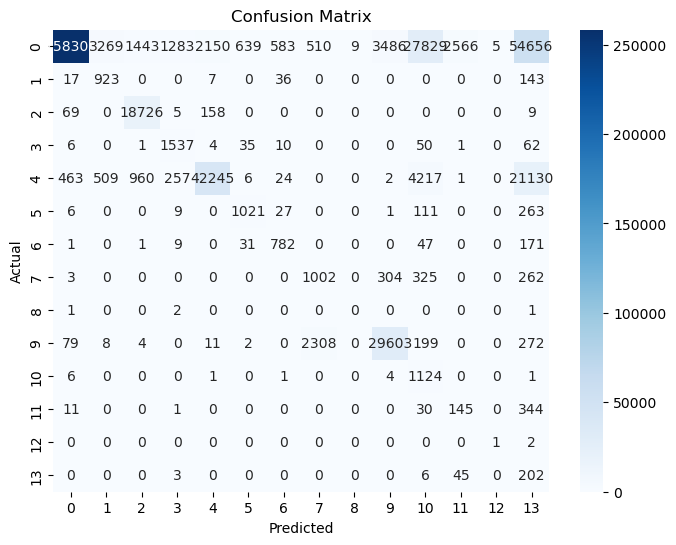

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sample the data to reduce memory load (adjustable percentage)
sample_percentage = 0.01  # Change this value to control sampling size
sample_size = int(len(X_train_resampled) * sample_percentage)
X_sampled, y_sampled = resample(X_train_resampled, y_train_resampled, n_samples=sample_size, random_state=42)

# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_sampled, y_sampled)

# Step 3: Align X_test with the selected numerical features
X_test_filtered = X_test[selected_numerical_features]

# Step 4: Predictions
y_pred = rf_model.predict(X_test_filtered)

# Step 5: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_filtered), multi_class='ovr')

# Step 6: Display Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CREATING/TRANING/TESTING/EVALUATING THE BASELINE MODEL

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Drop irrelevant columns from both training and test sets
X_train.drop(['flow_id', 'src_ip', 'dst_ip'], axis=1, inplace=True)
X_test.drop(['flow_id', 'src_ip', 'dst_ip'], axis=1, inplace=True)

# Convert 'timestamp' to datetime and extract useful features
X_train['timestamp'] = pd.to_datetime(X_train['timestamp'], errors='coerce')
X_test['timestamp'] = pd.to_datetime(X_test['timestamp'], errors='coerce')

X_train['hour'] = X_train['timestamp'].dt.hour
X_train['day'] = X_train['timestamp'].dt.day
X_train['month'] = X_train['timestamp'].dt.month
X_test['hour'] = X_test['timestamp'].dt.hour
X_test['day'] = X_test['timestamp'].dt.day
X_test['month'] = X_test['timestamp'].dt.month

X_train.drop('timestamp', axis=1, inplace=True)
X_test.drop('timestamp', axis=1, inplace=True)

# Encode 'protocol' using .map() for safe handling of unseen labels
unique_protocols = X_train['protocol'].unique()
protocol_mapping = {protocol: idx for idx, protocol in enumerate(unique_protocols)}

# Map 'protocol' values to numerical format
X_train['protocol'] = X_train['protocol'].map(protocol_mapping)
X_test['protocol'] = X_test['protocol'].map(protocol_mapping).fillna(-1).astype(int)  # Unknown protocols mapped to -1

# Train the Random Forest model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display Results
print(f"Baseline Model Evaluation:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Baseline Model Evaluation:

Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991

Classification Report:

                   precision    recall  f1-score   support

           Benign       1.00      1.00      1.00    356733
      Botnet_ARES       0.99      0.99      0.99      1126
        DDoS_LOIT       1.00      1.00      1.00     18967
    DoS_GoldenEye       0.99      0.97      0.98      1706
         DoS_Hulk       1.00      1.00      1.00     69814
 DoS_Slowhttptest       0.92      0.99      0.95      1438
    DoS_Slowloris       0.99      0.94      0.97      1042
      FTP-Patator       0.93      1.00      0.96      1896
       Heartbleed       1.00      0.75      0.86         4
        Port_Scan       1.00      1.00      1.00     32486
      SSH-Patator       1.00      0.99      1.00      1137
  Web_Brute_Force       0.99      0.97      0.98       531
Web_SQL_Injection       1.00      0.67      0.80         3
          Web_XSS       0.99      0.98      0.98     

ROC

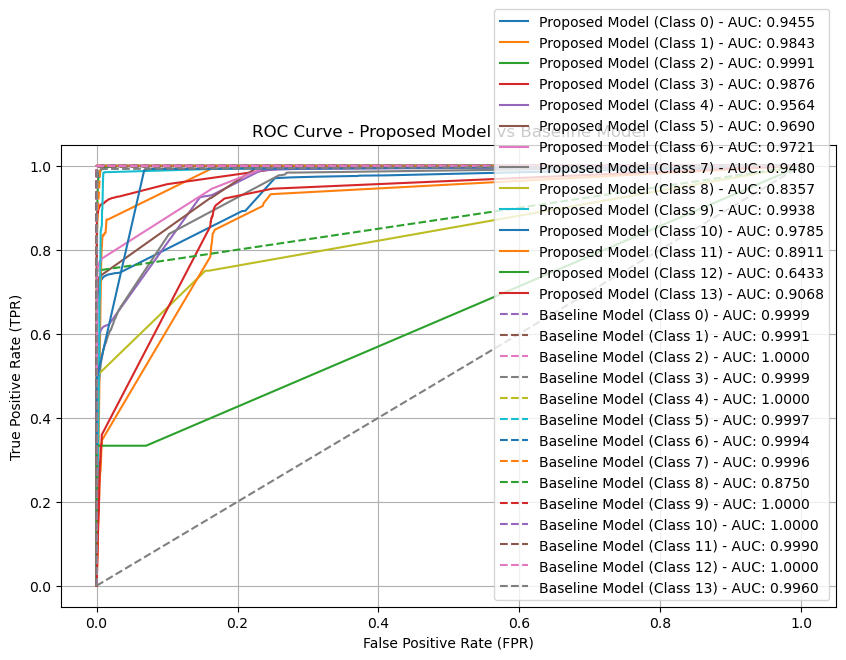

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Proposed Model Predictions (Probability Scores)
proposed_model_probs = rf_model.predict_proba(X_test_filtered)

# Baseline Model Predictions (Probability Scores)
baseline_model_probs = baseline_model.predict_proba(X_test)

# Plot ROC Curve
plt.figure(figsize=(10, 6))

# ROC Curve for Proposed Model
for i in range(y_test_binarized.shape[1]):  # Multi-class setup
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], proposed_model_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], proposed_model_probs[:, i])
    plt.plot(fpr, tpr, label=f'Proposed Model (Class {i}) - AUC: {auc_score:.4f}')

# ROC Curve for Baseline Model
for i in range(y_test_binarized.shape[1]):  # Multi-class setup
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], baseline_model_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], baseline_model_probs[:, i])
    plt.plot(fpr, tpr, label=f'Baseline Model (Class {i}) - AUC: {auc_score:.4f}', linestyle='--')

# Plot Configuration
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.title('ROC Curve - Proposed Model vs Baseline Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

SHAP    

Proposed Model - SHAP Summary Plot


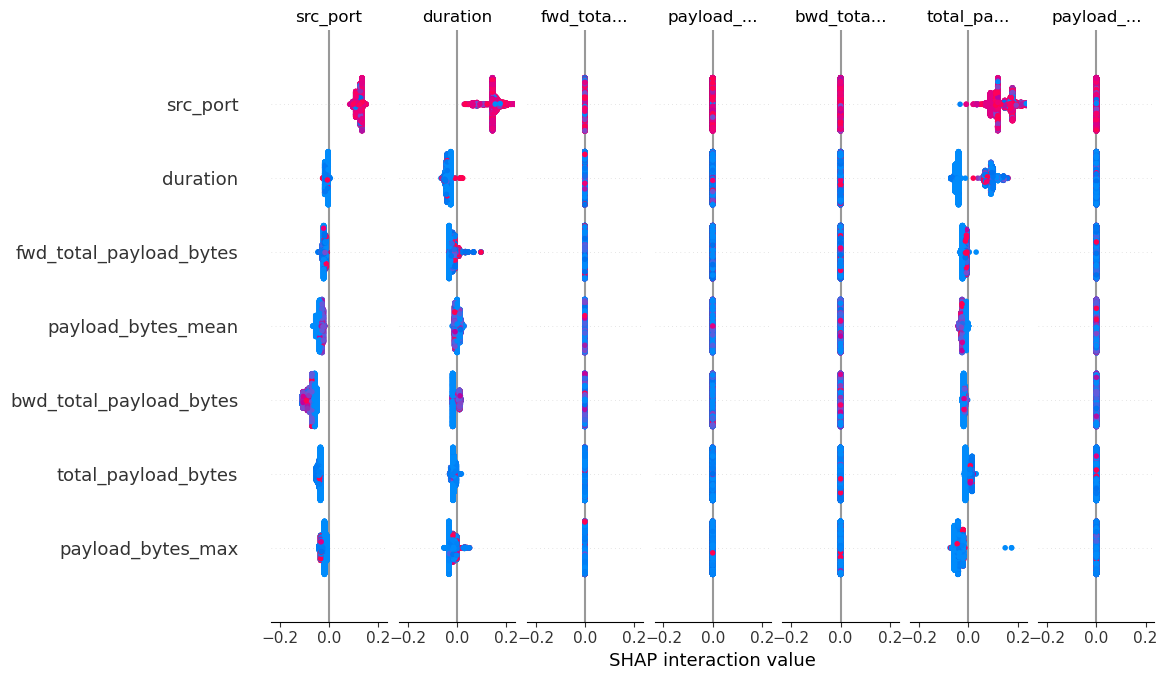

Baseline Model - SHAP Summary Plot


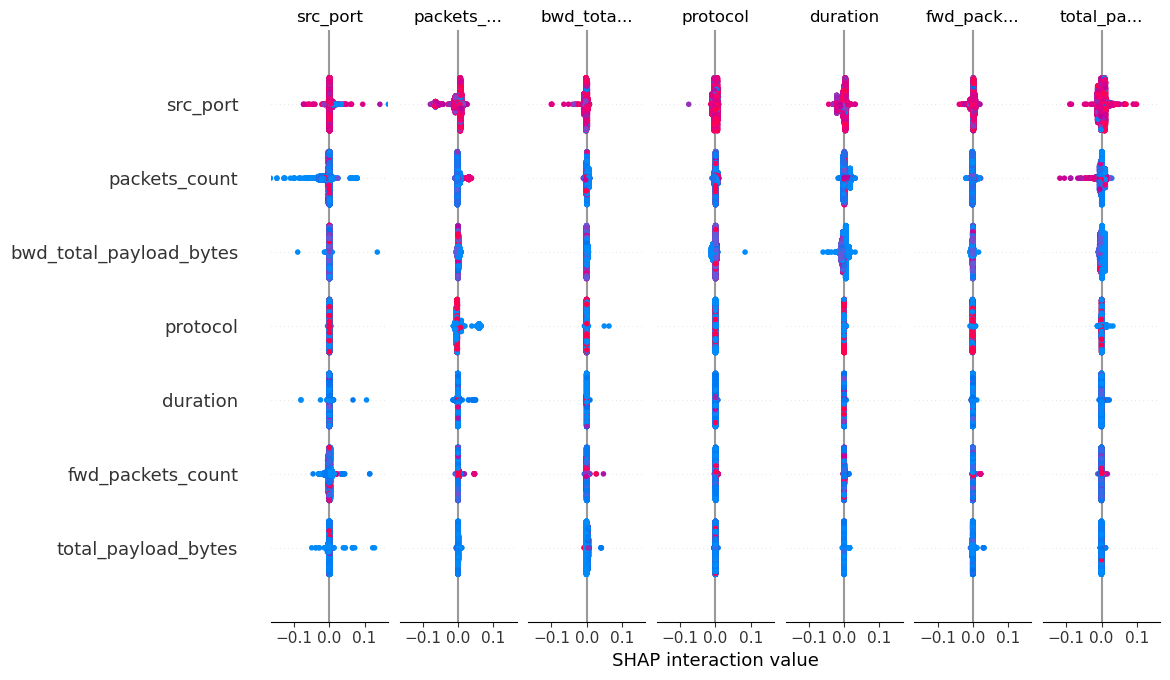

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Sample a Percentage of Data for Faster SHAP Calculation
sample_percentage = 0.25  # Example: 25% of the data
X_test_sampled = X_test.sample(frac=sample_percentage, random_state=42)

# Step 2: Initialize SHAP Explainer for Both Models
explainer_proposed = shap.TreeExplainer(rf_model)      # Proposed Model
explainer_baseline = shap.TreeExplainer(baseline_model) # Baseline Model

# Step 3: Compute SHAP Values
shap_values_proposed = explainer_proposed.shap_values(X_test_sampled)
shap_values_baseline = explainer_baseline.shap_values(X_test_sampled)

# Step 4: Visualizations

# 🔹 Summary Plot - Proposed Model
print("Proposed Model - SHAP Summary Plot")
shap.summary_plot(shap_values_proposed, X_test_sampled)

# 🔹 Summary Plot - Baseline Model
print("Baseline Model - SHAP Summary Plot")
shap.summary_plot(shap_values_baseline, X_test_sampled)

CROSS VALIDATION USING  K-FOLD 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Definir as métricas que serão utilizadas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Definir os modelos
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
proposed_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Número de folds para o Cross-Validation
k_folds = 5

# Avaliar o modelo baseline
print("Baseline Model Evaluation:")
baseline_scores = cross_val_score(baseline_model, combined_dataframe.drop('label', axis=1), 
                                  combined_dataframe['label'], cv=k_folds, scoring='accuracy')
print(f"Accuracy: {np.mean(baseline_scores):.4f} ± {np.std(baseline_scores):.4f}")

# Avaliar o modelo proposto
print("\nProposed Model Evaluation:")
proposed_scores = cross_val_score(proposed_model, combined_dataframe.drop('label', axis=1), 
                                  combined_dataframe['label'], cv=k_folds, scoring='accuracy')
print(f"Accuracy: {np.mean(proposed_scores):.4f} ± {np.std(proposed_scores):.4f}")

Baseline Model Evaluation:


KeyboardInterrupt: 